In [1]:
from astropy.io import fits
from astropy.table import Table, QTable
from astropy.table import vstack
import astropy.table as table
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from math import sqrt, log10
import astropy.units as u
from astropy.io import ascii
import astropy.io
from astropy.time import Time

from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.ticker as ticker

#For displaying fits image
from astropy.wcs import WCS
from astropy.wcs.utils import skycoord_to_pixel
from astropy.utils.data import get_pkg_data_filename

from astropy.coordinates import SkyCoord

#maybe
from matplotlib import path
#maybe

arcsec = 1/3600

### Things to do:
- quantify intrinsic motions X
- Analyze any high velocity stars from Kim18 X
- Compare orientation of vectors
- Compare the radial separation between stars ~
- Check if entries are binaries 
- Add image
- Clean up fits tables X

In [2]:
confEnhance = Table.read('c:\\users\\sahal\\2018TrinaryWork\\TrinaryStarSearch\\data\\enhancedMatchedConfirmedMembers.fits')
#CHECK IF STARS ARE CONFIRMED MEMBERS OF ORION GROUP
aa1 = np.where(confEnhance['apogee_1'] == True)[0]
bb1 = np.where(confEnhance['grosschedl18_1'] == True)[0]
cc1 = np.where(confEnhance['fang09_1'] == True)[0]
dd1 = np.where(confEnhance['fang13_1'] == True)[0]
ee1 = np.where(confEnhance['hsu12_1'] == True)[0]
ff1 = np.where(confEnhance['hsu13_1'] == True)[0]
gg1 = np.where(confEnhance['kounkel16_1'] == True)[0]
hh1 = np.where(confEnhance['hasenberger16_1'] == True)[0]
ii1= np.where(confEnhance['pillitteri13_1'] == True)[0]
jj1= np.where(confEnhance['fang17_1'] == True)[0]
kk1= np.where(confEnhance['megeath12_1'] == True)[0]
ll1= np.where(confEnhance['kounkel17_1'] == True)[0]
mm1= np.where(confEnhance['rebull06_1'] == True)[0]
nn1= np.where(confEnhance['furesz08_1'] == True)[0]
oo1= np.where(confEnhance['getman05_1'] == True)[0]
pp1= np.where(confEnhance['hillenbrand97_1'] == True)[0]
qq1= np.where(confEnhance['dario10_1'] == True)[0]
rr1= np.where(confEnhance['dario12_1'] == True)[0]
ss1= np.where(confEnhance['kuhn14_1'] == True)[0]
tt1= np.where(confEnhance['getman14a_1'] == True)[0]
uu1= np.where(confEnhance['getman14b_1'] == True)[0]
vv1= np.where(confEnhance['sicilia-aguilar05_1'] == True)[0]

aa2 = np.where(confEnhance['apogee_2'] == True)[0]
bb2 = np.where(confEnhance['grosschedl18_2'] == True)[0]
cc2 = np.where(confEnhance['fang09_2'] == True)[0]
dd2 = np.where(confEnhance['fang13_2'] == True)[0]
ee2 = np.where(confEnhance['hsu12_2'] == True)[0]
ff2 = np.where(confEnhance['hsu13_2'] == True)[0]
gg2 = np.where(confEnhance['kounkel16_2'] == True)[0]
hh2= np.where(confEnhance['hasenberger16_2'] == True)[0]
ii2= np.where(confEnhance['pillitteri13_2'] == True)[0]
jj2= np.where(confEnhance['fang17_2'] == True)[0]
kk2= np.where(confEnhance['megeath12_2'] == True)[0]
ll2= np.where(confEnhance['kounkel17_2'] == True)[0]
mm2= np.where(confEnhance['rebull06_2'] == True)[0]
nn2= np.where(confEnhance['furesz08_2'] == True)[0]
oo2= np.where(confEnhance['getman05_2'] == True)[0]
pp2= np.where(confEnhance['hillenbrand97_2'] == True)[0]
qq2= np.where(confEnhance['dario10_2'] == True)[0]
rr2= np.where(confEnhance['dario12_2'] == True)[0]
ss2= np.where(confEnhance['kuhn14_2'] == True)[0]
tt2= np.where(confEnhance['getman14a_2'] == True)[0]
uu2= np.where(confEnhance['getman14b_2'] == True)[0]
vv2= np.where(confEnhance['sicilia-aguilar05_2'] == True)[0]

conf1 = np.unique(np.concatenate((aa1,bb1,cc1,dd1,ee1,ff1,gg1,hh1,ii1,jj1,ll1,mm1,nn1,oo1,pp1,qq1,rr1,ss1,tt1,uu1,vv1)))
conf2 = np.unique(np.concatenate((aa2,bb2,cc2,dd2,ee2,ff2,gg2,hh2,ii2,jj2,ll2,mm2,nn2,oo2,pp2,qq2,rr2,ss2,tt2,uu2,vv2)))

bothConf = np.intersect1d(conf1, conf2)

In [3]:
confEnhance[bothConf] #This is only pairs where both are confirmed to be in the intersecting system
#proper motions are in mas/yr

<Table masked=True length=122>
       ra1                dec1        ...      Separation     
                                      ...        arcsec       
     float64            float64       ...       float64       
----------------- ------------------- ... --------------------
83.48251170091393  -4.797265264995391 ...   0.3471140324808718
84.50349454157684  -7.264919768031094 ...   0.7258517235133175
83.80750024239218  -5.368619012600222 ...   0.0761329511401138
 83.7195239571433  -6.593241993769447 ...   0.4694405657886967
83.65654345602215  -5.719653382252161 ...   0.2693407105564869
83.91977272459164 -4.5917527465480115 ...  0.05139915557525386
83.81515177831886  -5.382343062037107 ...  0.11892735672163929
84.00075742282083  -6.709429193463292 ...  0.10898793919141639
83.81880335409515  -5.671688120812895 ...   0.1161465707755278
              ...                 ... ...                  ...
   83.63212371319  -3.864229195004269 ...   0.0963839892201919
83.65817350718062  -5.685763094672971 ...  0.07121375346033605
83.85204593941243  -6.477906638617849 ... 0.030992346439095753
83.91833203808689  -4.928892843966689 ...  0.09097390604278328
83.92927334949994  -4.783431763673312 ...  0.17608155835170797
83.88456703683278  -5.735007385648252 ...  0.21037472405543592
83.70137168746822  -6.378531405707777 ...  0.08695742808349621
84.16052061089854  -6.037986717237177 ... 0.007663375544502639
83.85700165688873 -5.5058617689380975 ...  0.19850393791517887
84.05404297188666  -5.924173048415913 ...  0.08762806179443368

In [4]:
def getABox(ras, decs, pmras, pmdecs):
    maxDist = np.max([np.max(np.abs(pmras)),np.max(np.abs(pmdecs))]) / 3600 / 1000 * 100


    xmin = np.mean(ras) - arcsec/2 - maxDist
    xmax = np.mean(ras) + arcsec/2 + maxDist

    ymin = np.mean(decs) - arcsec/2 - maxDist
    ymax = np.mean(decs) + arcsec/2 + maxDist

    return ([xmin, xmax], [ymin, ymax])
"""
for rowNum in bothConf:
    x1 = confEnhance['projected_ra1'][rowNum]
    y1 = confEnhance['projected_dec1'][rowNum]
    xvec1 = confEnhance['pmra1'][rowNum]
    yvec1 = confEnhance['pmdec1'][rowNum]
    
    x2 = confEnhance['projected_ra2'][rowNum]
    y2 = confEnhance['projected_dec2'][rowNum]
    xvec2 = confEnhance['pmra2'][rowNum]
    yvec2 = confEnhance['pmdec2'][rowNum]
    
    currentT = confEnhance['time'][rowNum]
    
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize = (11,11))

    axs.plot(x1, y1, '.')
    axs.plot(x2, y2, '.')
    #1/1000 - convert from mas to as - 1/3600 * 1/1000 - convert from as to deg - 100 - vector for 100 years
    axs.plot([x1, x1 + (1/3600) * (1/1000) * 100 * xvec1], [y1, y1 + (1/3600) * (1/1000) * 100 * yvec1])
    axs.plot([x2, x2 + (1/3600) * (1/1000) * 100 * xvec2], [y2, y2 + (1/3600) * (1/1000) * 100 * yvec2])
    
    xstops, ystops = getABox(np.array([x1,x2]), np.array([y1, y2]), np.array([xvec1, xvec2]), np.array([yvec1, yvec2]))
    axs.set_xlim(xstops)
    axs.set_ylim(ystops)
    
    axs.xaxis.set_ticks(np.arange(xstops[0], xstops[1], arcsec*.1), True)
    axs.xaxis.set_ticks(xstops, False)
    axs.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.4f' + ' Degrees'))

    axs.yaxis.set_ticks(np.arange(ystops[0], ystops[1], arcsec*.1), True)
    axs.yaxis.set_ticks(ystops, False)
    axs.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.4f' + ' Degrees'))

    axs.set_aspect('equal')
    
    axs.set_title('Pair of stars projected at time ' + str(currentT) + ' years')
    axs.set_xlabel('Right Ascension (Ticks: 100 mas)')
    axs.set_ylabel('Declination (Ticks: 100 mas)')
    
    plt.show()"""
print()

In [5]:
x_1 = confEnhance['ra1'][bothConf]
x_2 = confEnhance['ra2'][bothConf]
y_1 = confEnhance['dec1'][bothConf]
y_2 = confEnhance['dec2'][bothConf]
dx_1 = confEnhance['pmra1'][bothConf] /1000 /3600 
dx_2 = confEnhance['pmra2'][bothConf] /1000 / 3600
dy_1 = confEnhance['pmdec1'][bothConf] /1000 /3600
dy_2 = confEnhance['pmdec2'][bothConf] /1000 / 3600

#intx = .5 * (dx_1 + dx_2)
#inty = .5 * (dy_1 +  dy_2)

In [6]:
"""for rowNum in bothConf:
    x1 = confEnhance['projected_ra1'][rowNum]
    y1 = confEnhance['projected_dec1'][rowNum]
    xvec1 = confEnhance['pmra1'][rowNum]
    yvec1 = confEnhance['pmdec1'][rowNum]
    
    
    x2 = confEnhance['projected_ra2'][rowNum]
    y2 = confEnhance['projected_dec2'][rowNum]
    xvec2 = confEnhance['pmra2'][rowNum]
    yvec2 = confEnhance['pmdec2'][rowNum]
    
    currentT = confEnhance['time'][rowNum]
    
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize = (11,11))

    axs.plot(x1, y1, '.')
    axs.plot(x2, y2, '.')
    #1/1000 - convert from mas to as - 1/3600 - convert from as to deg - 100 - vector for 100 years
    axs.plot([x1, x1 + (1/3600) * (1/1000) * 100 * xvec1], [y1, y1 + (1/3600) * (1/1000) * 100 * yvec1])
    axs.plot([x2, x2 + (1/3600) * (1/1000) * 100 * xvec2], [y2, y2 + (1/3600) * (1/1000) * 100 * yvec2])
    
    
    
    intx = .5 * (xvec1 /3600000 + xvec2 /3600000)
    inty = .5 * (yvec1/3600000 +  yvec2/3600000)
    
    
    ###NEW 
    axs.plot([x1, x1 + (1/3600) * (1/1000) * 100 * xvec1 - intx * 100], 
             [y1, y1 + (1/3600) * (1/1000) * 100 * yvec1 - inty * 100], '--')
    axs.plot([x2, x2 + (1/3600) * (1/1000) * 100 * xvec2 - intx * 100],
             [y2, y2 + (1/3600) * (1/1000) * 100 * yvec2 - inty * 100], '--')
    ###NEW
    
    xstops, ystops = getABox(np.array([x1,x2]), np.array([y1, y2]), np.array([xvec1, xvec2]), np.array([yvec1, yvec2]))
    axs.set_xlim(xstops)
    axs.set_ylim(ystops)
    
    axs.xaxis.set_ticks(np.arange(xstops[0], xstops[1], arcsec*.1), True)
    axs.xaxis.set_ticks(xstops, False)
    axs.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.4f' + ' Degrees'))

    axs.yaxis.set_ticks(np.arange(ystops[0], ystops[1], arcsec*.1), True)
    axs.yaxis.set_ticks(ystops, False)
    axs.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.4f' + ' Degrees'))

    axs.set_aspect('equal')
    
    axs.set_title('Pair of stars projected at time ' + str(currentT) + ' years')
    axs.set_xlabel('Right Ascension (Ticks: 100 mas)')
    axs.set_ylabel('Declination (Ticks: 100 mas)')
    
    #I'll take a stab at finding the radial separation, at first just using gaia 
    #parallax is in mas, so multiply by (1/1000) to convert to arcseconds
    pi1 = confEnhance['parallax1'][rowNum] / 1000
    pi2 = confEnhance['parallax2'][rowNum] / 1000
    
    ##DO ERRORS - errors are significant for parallax
    
    d1 = 1/pi1 #distance to star 1 in pc
    d2 = 1/pi2 #distance to star 2 in pc
    
    sep = np.abs(d2-d1)
    if sep < 10: 
        plt.text(.9,.95, str(round(sep,3))+' pc',transform=axs.transAxes, color='r')
    else:
        plt.text(.9,.95, str(round(sep,3))+' pc',transform=axs.transAxes, color='b')
        
    #Also check if binaries:
    bin1 = confEnhance['isbin_1'][rowNum]
    bin2 = confEnhance['isbin_2'][rowNum]
    if bin1 == 3 or bin2 == 3:
        plt.text(.98,.9, 'Definitely binary',transform=axs.transAxes, color = 'r', horizontalalignment = 'right')
    elif bin1 == 2 or bin2 == 2:
        plt.text(.98, .9, 'Very likely binay', transform = axs.transAxes, color = 'r',horizontalalignment = 'right')
    elif bin1 == 1 or bin2 == 1:
        plt.text(.99, .9, 'Likely binary', transform = axs.transAxes, color = 'b',horizontalalignment = 'right') 
    else:
        plt.text(.98, .9, 'Not likely binaries', transform = axs.transAxes,horizontalalignment = 'right')
    plt.show()
"""
print()

# High Velocity Stars from Kim, et al. 2018

In [7]:
kim18 = Table.read('C:\\Users\sahal\\2018TrinaryWork\\TrinaryStarSearch\\Data\\kim18.fits')
kim18

<Table length=5>
  ID       ra         dec     mualpha ... Nepochs    dT    mag139  flag
int16   float64     float64   float32 ...  int16  float32 float32  bool
----- ----------- ----------- ------- ... ------- ------- ------- -----
  137 83.80750185 -5.36862019   -1.51 ...       3    14.0     9.7 False
  567 83.81247376 -5.36664137    2.25 ...       2    14.0   10.37 False
  445 83.79075216 -5.40193468   -5.21 ...       3    16.3   17.34 False
  500 83.84404645  -5.4340279   -2.93 ...       3    19.3   16.97 False
  621 83.82598692 -5.42645888   12.93 ...       2    14.6   13.06 False

When comparing kim18 in topcat, I found that row 7 was the only one with matches. Both stars in this pair were in the kim18 list of high velocity stars (the first two in the above table) and both were confirmed to be within the cluster. This is something I will explore further. 

In [8]:
nn = Table.read('c:\\users\\sahal\\2018TrinaryWork\\TrinaryStarSearch\\Data\\enhancedplushighpm.fits')#still pairs
ofNote = nn[bothConf][2]

In [9]:
ofNote #Just one star from Kim18 was of interest

<Row index=2 masked=True>
       ra1               dec1                pmra1                pmdec1          projected_ra1     projected_dec1       parallax1     rVelocity1    G1      bprp1         ra_err1              dec_err1           pmra_err1           pmdec_err1        parralax_err1    rv_err1       ra2               dec2             pmra2              pmdec2        projected_ra2     projected_dec2       parallax2      rVelocity2    G2      bprp2         ra_err2              dec_err2           pmra_err2          pmdec_err2        parralax_err2    rv_err2      ref_pmra          ref_pmdec       time   ra_1   dec_1    rv_1   rve_1  isbin_1 Separation_1    ra_2     dec_2     rv_2   rve_2   isbin_2    Separation_1a      RA_1a      DEC_1a   apogee_1 grosschedl18_1 fang09_1 fang13_1 hsu12_1 hsu13_1 kounkel16_1 hasenberger16_1 pillitteri13_1 fang17_1 megeath12_1 kounkel17_1 rebull06_1 furesz08_1 getman05_1 hillenbrand97_1 dario10_1 dario12_1 kuhn14_1 getman14a_1 getman14b_1 sicilia-aguilar05_1    Separation_1b          RA_2a             DEC_2a       apogee_2 grosschedl18_2 fang09_2 fang13_2 hsu12_2 hsu13_2 kounkel16_2 hasenberger16_2 pillitteri13_2 fang17_2 megeath12_2 kounkel17_2 rebull06_2 furesz08_2 getman05_2 hillenbrand97_2 dario10_2 dario12_2 kuhn14_2 getman14a_2 getman14b_2 sicilia-aguilar05_2   Separation_1c     ID_1    ra_1b       dec_1b   mualpha_1 mualpha_err_1 mudelta_1 mudelta_err_1 Nepochs_1   dT_1  mag139_1 flag_1    Separation_1d      ID_2    ra_2b       dec_2b   mualpha_2 mualpha_err_2 mudelta_2 mudelta_err_2 Nepochs_2   dT_2  mag139_2 flag_2       Separation     
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   arcsec                                                        arcsec                                                                                                                                                                                                                                                                                                    arcsec                                                                                                                                                                                                                                                                                                                  arcsec                                                                                                                              arcsec                                                                                                                                arcsec       
     float64           float64              float64              float64             float64           float64            float64       float64   float32   float32        float64              float64             float64             float64             float64       float64     float64           float64           float64            float64           float64           float64            float64        float64   float32   float32        float64              float64             float64            float64             float64       float64      float64            float64       int32 float64 float64 float64 float64  int16    float64     float64   float64  float64 float64   int16        float64        float64    float64     bool        bool        bool     bool     bool    bool      bool          bool           b

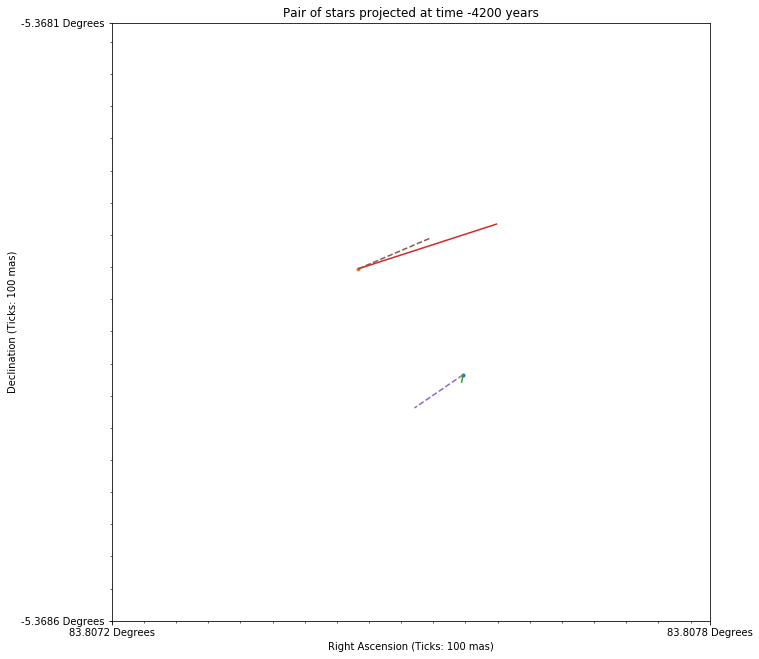

In [10]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize = (11,11))
xx1 = ofNote['projected_ra1']
xx2 = ofNote['projected_ra2']
yy1 = ofNote['projected_dec1']
yy2 = ofNote['projected_dec2']
xxvec1 = ofNote['pmra1']
xxvec2 = ofNote['pmra2']
yyvec1 = ofNote['pmdec1']
yyvec2 = ofNote['pmdec2']

kim18pmra1 = ofNote['mualpha_1']
kim18pmra2 = ofNote['mualpha_2']
kim18pmdec1 = ofNote['mudelta_1']
kim18pmdec2 = ofNote['mudelta_2']

axs.plot(xx1, yy1, '.')
axs.plot(xx2, yy2, '.')
#1/1000 - convert from mas to as - 1/3600 - convert from as to deg - 100 - vector for 100 years
axs.plot([xx1, xx1 + (1/3600) * (1/1000) * 100 * xxvec1], [yy1, yy1 + (1/3600) * (1/1000) * 100 * yyvec1])
axs.plot([xx2, xx2 + (1/3600) * (1/1000) * 100 * xxvec2], [yy2, yy2 + (1/3600) * (1/1000) * 100 * yyvec2])

axs.plot([xx1, xx1 + (1/3600) * (1/1000) * 100 * kim18pmra1], [yy1, yy1 + (1/3600) * (1/1000) * 100 * kim18pmdec1], '--')
axs.plot([xx2, xx2 + (1/3600) * (1/1000) * 100 * kim18pmra2], [yy2, yy2 + (1/3600) * (1/1000) * 100 * kim18pmdec2], '--')
   
    
"""   
    ###NEW 
axs.plot([x1, x1 + (1/3600) * (1/1000) * 100 * xvec1 - intx[colNum] * 100], 
         [y1, y1 + (1/3600) * (1/1000) * 100 * yvec1 - inty[colNum] * 100], '--')
axs.plot([x2, x2 + (1/3600) * (1/1000) * 100 * xvec2 - intx[colNum] * 100],
         [y2, y2 + (1/3600) * (1/1000) * 100 * yvec2 - inty[colNum] * 100], '--')
    ###NEW
"""
xstops, ystops = getABox(np.array([xx1,xx2]), np.array([yy1, yy2]), np.array([xxvec1, xxvec2]), np.array([yyvec1, yyvec2]))
axs.set_xlim(xstops)
axs.set_ylim(ystops)
    
axs.xaxis.set_ticks(np.arange(xstops[0], xstops[1], arcsec*.1), True)
axs.xaxis.set_ticks(xstops, False)
axs.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.4f' + ' Degrees'))

axs.yaxis.set_ticks(np.arange(ystops[0], ystops[1], arcsec*.1), True)
axs.yaxis.set_ticks(ystops, False)
axs.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.4f' + ' Degrees'))

axs.set_aspect('equal')
    
axs.set_title('Pair of stars projected at time ' + str(ofNote['time']) + ' years')
axs.set_xlabel('Right Ascension (Ticks: 100 mas)')
axs.set_ylabel('Declination (Ticks: 100 mas)')
    
#I'll take a stab at finding the radial separation, at first just using gaia 

    
plt.show()

#Maybe I should look at the errors

# Consolidate Fits table into more usable format
I should have done this at the beginning of this file

In [11]:
tab = nn[:]
tab.remove_columns(['ra_1', 'dec_1', 'ra_2', 'Separation_1', 'dec_2','Separation_1a','RA_1a', 'DEC_1a',
                    
                    'apogee_1',
                   'grosschedl18_1', 'fang09_1','fang13_1', 'hsu12_1', 'hsu13_1', 'kounkel16_1','hasenberger16_1',
                    'pillitteri13_1','fang17_1','megeath12_1','kounkel17_1','rebull06_1', 'furesz08_1','getman05_1',
                   'hillenbrand97_1','dario10_1', 'dario12_1', 'kuhn14_1', 'getman14a_1', 'getman14b_1', 
                   'sicilia-aguilar05_1', 'Separation_1b',
                   
                    'RA_2a','DEC_2a','apogee_2',
                   'grosschedl18_2', 'fang09_2','fang13_2','hsu12_2', 'hsu13_2', 'kounkel16_2','hasenberger16_2',
                    'pillitteri13_2','fang17_2','megeath12_2','kounkel17_2','rebull06_2', 'furesz08_2','getman05_2',
                   'hillenbrand97_2','dario10_2', 'dario12_2', 'kuhn14_2', 'getman14a_2', 'getman14b_2', 
                   'sicilia-aguilar05_2', 'Separation', 'Separation_1c', 'Separation_1d', 'ra_1b', 'dec_1b', 'Nepochs_1',
                    'flag_1','ra_2b', 'dec_2b', 'Nepochs_2', 'flag_2'
                   ])

In [12]:
bothMemberCol = np.zeros(440, dtype = bool)
oneMemberCol = np.zeros(440, dtype = bool)
twoMemberCol = np.zeros(440, dtype = bool)

bothMemberCol[bothConf] = True
oneMemberCol[conf1] = True
twoMemberCol[conf2] = True

tab['isMember1'] = oneMemberCol
tab['isMember2'] = twoMemberCol
tab['bothMembers'] = bothMemberCol

In [13]:
tab #This table is all intersecting stars where both are confirmed, with unnecessary info removed

<Table masked=True length=440>
       ra1                dec1        ... isMember2 bothMembers
     float64            float64       ...    bool       bool   
----------------- ------------------- ... --------- -----------
83.48251170091393  -4.797265264995391 ...      True        True
84.53876810637198  -6.821279333750583 ...     False       False
84.50349454157684  -7.264919768031094 ...      True        True
84.08028325875834 -5.0079025103820145 ...     False       False
83.85776095102422  -5.132364341100109 ...      True       False
83.34410194171222  -5.544440845586294 ...     False       False
83.80750024239218  -5.368619012600222 ...      True        True
 83.7195239571433  -6.593241993769447 ...      True        True
83.18031059815155 -3.5702444298926785 ...     False       False
83.66335680551727  -6.423405046660318 ...     False       False
              ...                 ... ...       ...         ...
84.45924990389912  -4.438009733064608 ...     False       False
84.16608073071997  -5.164043333593824 ...     False       False
85.02207689399522  -4.496380486848115 ...     False       False
83.38985617177144 -6.7922400528817795 ...     False       False
83.64361995639554  -5.051924310510663 ...     False       False
83.20006229668262  -3.712222443638848 ...     False       False
83.84683276263593  -4.717504208737631 ...     False       False
84.01880467042166  -5.158016190353435 ...     False       False
84.05404297188666  -5.924173048415913 ...      True        True
85.11605382087927  -6.615400149408633 ...     False       False

In [14]:
#tab.write('c:\\users\\sahal\\2018TrinaryWork\\TrinaryStarSearch\\Data\\ConsolidatedPairsTable.fits',format = 'fits',
         #overwrite=True)

Get anything with high proper motion even if it doesn't have a pair
Throw out non-high-velocity stars


Filter for proper motions outside of the main group. Do this both for the ones with matched pair, and for all confirmed members

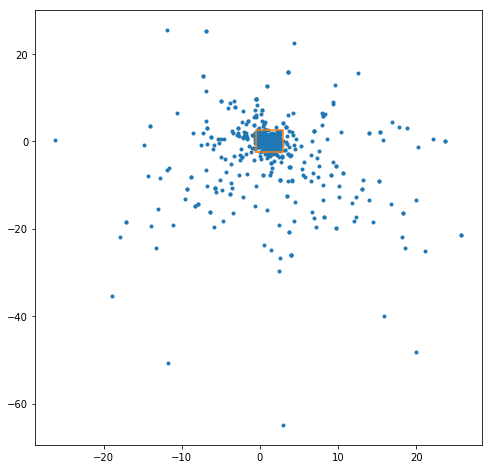

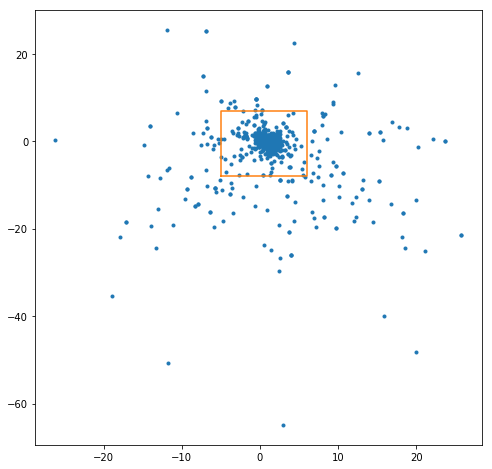

In [15]:
plt.figure(figsize=(8,8))

plt.plot(tab['pmra1'],tab['pmdec1'],'.')
plt.plot(tab['pmra2'], tab['pmdec2'], '.', color = '#1f77b4')

plt.plot([-.5,-.5, 3, 3, -.5],[-2.5,2.5, 2.5,-2.5, -2.5])
plt.show()


plt.figure(figsize=(8,8))

plt.plot(tab['pmra1'],tab['pmdec1'],'.')
plt.plot(tab['pmra2'], tab['pmdec2'], '.', color = '#1f77b4')

plt.plot([-5,-5, 6, 6, -5],[-8,7,7,-8, -8])
plt.show()


In [16]:
xfilter1 = np.where((tab['pmra1'] < 3) & (tab['pmra1'] > -.5))[0]
yfilter1 = np.where((tab['pmdec1'] < 2.5) & (tab['pmdec1'] > -2.5))[0]
filter1 = np.intersect1d(xfilter1, yfilter1)
tightmask1 = np.arange(len(tab))
tightmask1 = np.delete(tightmask1, filter1)

xfilter2 = np.where((tab['pmra2'] < 3) & (tab['pmra2'] > -.5))[0]
yfilter2 = np.where((tab['pmdec2'] < 2.5) & (tab['pmdec2'] > -2.5))[0]
filter2 = np.intersect1d(xfilter2, yfilter2)
tightmask2 = np.arange(len(tab))
tightmask2 = np.delete(tightmask2, filter2)

#Define a looser filter
xfilter1 = np.where((tab['pmra1'] < 6) & (tab['pmra1'] > -5))[0]
yfilter1 = np.where((tab['pmdec1'] < 7) & (tab['pmdec1'] > -8))[0]
filter1 = np.intersect1d(xfilter1, yfilter1)
loosemask1 = np.arange(len(tab))
loosemask1 = np.delete(loosemask1, filter1)

xfilter2 = np.where((tab['pmra2'] < 6) & (tab['pmra2'] > -5))[0]
yfilter2 = np.where((tab['pmdec2'] < 7) & (tab['pmdec2'] > -8))[0]
filter2 = np.intersect1d(xfilter2, yfilter2)
loosemask2 = np.arange(len(tab))
loosemask2 = np.delete(loosemask2, filter2)

We'll use the broader of the two filters for the time being.

In [17]:
allWithHiPM = np.unique(np.concatenate((loosemask1, loosemask2)))

168


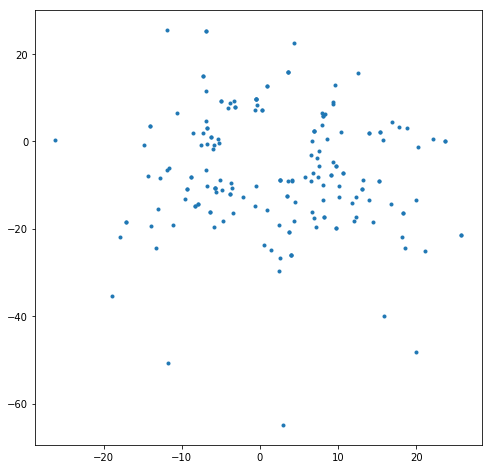

In [18]:
"""plt.figure(figsize=(8,8))
plt.plot(tab['pmra1'][tightmask1], tab['pmdec1'][tightmask1], '.')
plt.plot(tab['pmra2'][tightmask2], tab['pmdec2'][tightmask2], '.')
plt.show()"""

print(len(allWithHiPM))
plt.figure(figsize=(8,8))
#These stars are matched to stars with higher proper motions but themselves may be low proper motion
#plt.plot(tab['pmra1'][allWithHiPM], tab['pmdec1'][allWithHiPM], '.', color = 'r')
#plt.plot(tab['pmra2'][allWithHiPM], tab['pmdec2'][allWithHiPM], '.', color = 'r')

#These stars have high proper motions
plt.plot(tab['pmra1'][loosemask1], tab['pmdec1'][loosemask1], '.')
plt.plot(tab['pmra2'][loosemask2], tab['pmdec2'][loosemask2], '.', color = '#1f77b4')

plt.show()

In [19]:
pmMag1 = np.sqrt(tab['pmra1']**2+tab['pmdec1']**2)
pmMag2 = np.sqrt(tab['pmra2']**2+tab['pmdec2']**2)

orderInds1 = np.flip((np.argsort(pmMag1)))
orderInds2 = np.flip((np.argsort(pmMag2)))

tab['pmMag1'] = pmMag1#adds columns for the magnitudes of the pm vectors
tab['pmMag2'] = pmMag2

In [20]:
#tab['pmMag1','pmMag2','isMember1', 'isMember2'][orderInds1].show_in_notebook()
#tab['pmMag1', 'pmMag2', 'isMember1', 'isMember2'][orderInds2].show_in_notebook()

In [21]:
print(len(bothConf))

122


In [22]:
hdul=fits.open('c:\\users\\sahal\\2018TrinaryWork\\TrinaryStarSearch\\Data\\gaiadr2_oriontables.fits')
rawdat = hdul[1].data
gaiatab = Table([rawdat['ra'], rawdat['dec'], rawdat['pmra'], rawdat['pmdec']], names = ('ra', 'dec', 'pmra', 'pmdec'))
gaiatab#A really basic extraction of gaia data, not efficient, not sure if used

<Table length=13212>
        ra                dec                 pmra               pmdec        
     float64            float64             float64             float64       
----------------- ------------------- ------------------- --------------------
81.97889096582296  -5.765129228416344 -0.9141919249847108  -5.9972304226149005
82.02727942230699    -5.7650318069253  -3.657273242187693  -3.6799923916601296
81.99600533940034  -5.757693215731141  -8.307974440814379     2.18429279001918
81.98389752383596  -5.787018177200288  15.535096599989318   1.0763009097662448
82.01503802055565  -5.768515262953273  0.7058287943406472   -3.478188592410513
81.95061914879064  -5.748906696109058   -4.83873731639687 0.023365515958923236
81.93566383342171 -5.7719578470336295  0.1713604040316779    4.802939836646864
 82.0036321409747  -5.746326929668049  3.0809136324038304   -9.240311327673925
 81.9301354053255  -5.464279841801587   23.14142949611642   -16.12327341263541
81.90478843664337   -5.43625762580561    3.39639220857026   -2.593983472420853
              ...                 ...                 ...                  ...
  84.576777629699  -7.061037364496167  -16.65119319525415    16.88259068382561
84.68668432607903  -7.046398918240023  0.8846535038603609  -0.7660661369378707
84.64184020064886 -7.0770056547355695   9.535468192292669  -16.555017328686212
84.83029970767747  -7.112202964585244  0.1217229034736143   0.4611518596497504
84.72208784427858  -7.095772447578123   0.138364097578001   0.1326939511504608
84.62085053499514 -7.0162477700978325 0.21954320248042497  -2.0948568355043795
84.62198086105765  -7.014824565700008  2.8587551493112624  -0.2782634852427964
 84.6070829133554  -7.088227936799327  -41.31431239263417     32.0552011640739
84.55606410212238  -7.112044580054687 0.17478854758359255   -1.118817405605375
84.55609207437314 -7.0019433394341695   4.204657618561697   -0.912795840639272

In [23]:
highlight = np.intersect1d(allWithHiPM,bothConf)

# All pair-matched stars plotted against Spitzer image

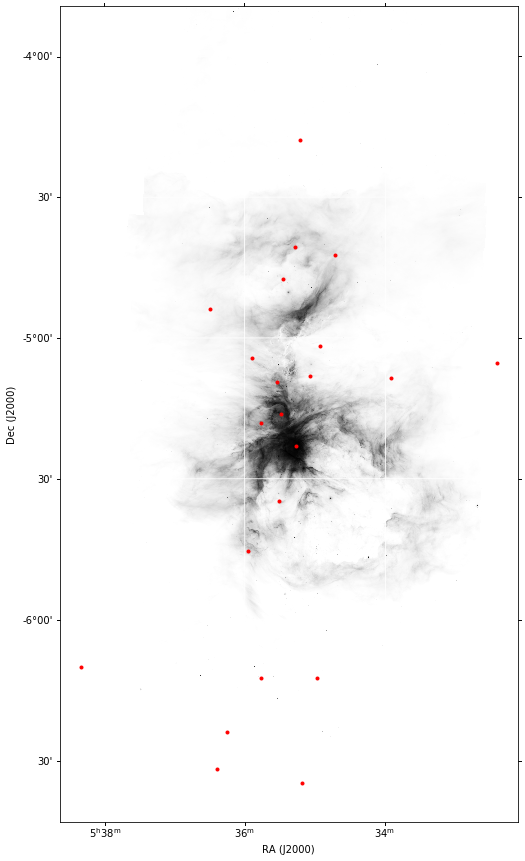

In [24]:
coord1 = SkyCoord(tab['ra1'],tab['dec1'], unit = 'deg', frame = 'icrs')[bothConf]
coordH1 = SkyCoord(tab['ra1'],tab['dec1'], unit = 'deg', frame = 'icrs')[highlight]
coord2 = SkyCoord(tab['ra2'], tab['dec2'], unit='deg', frame = 'icrs')[bothConf]
coordH2  = SkyCoord(tab['ra2'],tab['dec2'], unit = 'deg', frame = 'icrs')[highlight]

filename = 'C:\\users\\sahal\\2018TrinaryWork\\TrinaryStarSearch\\Data\\ch4_merged_clean.fits'#get_pkg_data_filename('ch4_merged_clean.fits')

hdu = fits.open(filename)[0]
hdu.header['CTYPE1']='RA---TAN-SIP'
hdu.header['CTYPE2']='DEC--TAN-SIP'
wcs = WCS(hdu.header)

fig = plt.figure(figsize = (15,15))
ax=plt.subplot(projection = wcs)
#ax.set_figheight(10)
#x.set_figwidth(10)
#ax.subplot(projection=wcs)
ax.imshow(np.arctan(0.0001*(hdu.data-np.median(hdu.data))), origin='lower',cmap='binary',vmin=0)
ax.grid(color='white', ls='solid')
ax.set_xlabel('RA (J2000)')
ax.set_ylabel('Dec (J2000)')
#plt.gca().set_ylim(1500,6500)

#ax.plot(coord1.ra, coord1.dec, '.', transform=ax.get_transform('icrs'),color = '#1f77b4')
ax.plot(coordH1.ra, coordH1.dec, '.', transform=ax.get_transform('icrs'), color = 'r')
#ax.plot(coord2.ra, coord2.dec, '.', transform = ax.get_transform('icrs'),color = '#1f77b4')
ax.plot(coordH2.ra, coordH2.dec, '.', transform = ax.get_transform('icrs'), color = 'r')

plt.show()

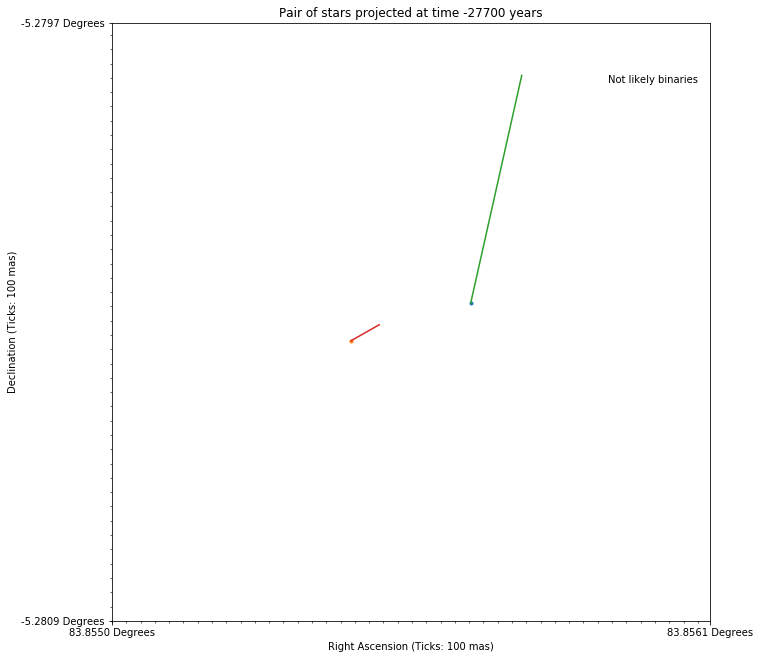

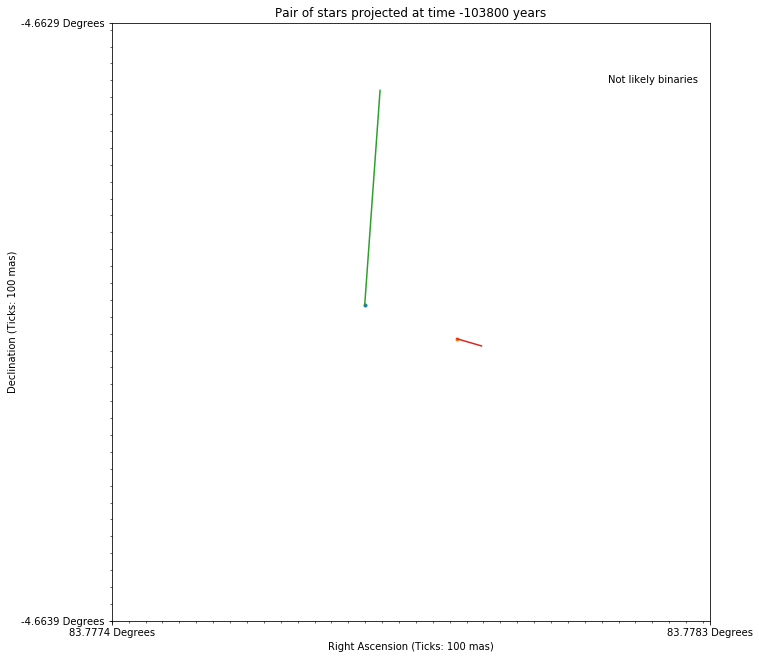

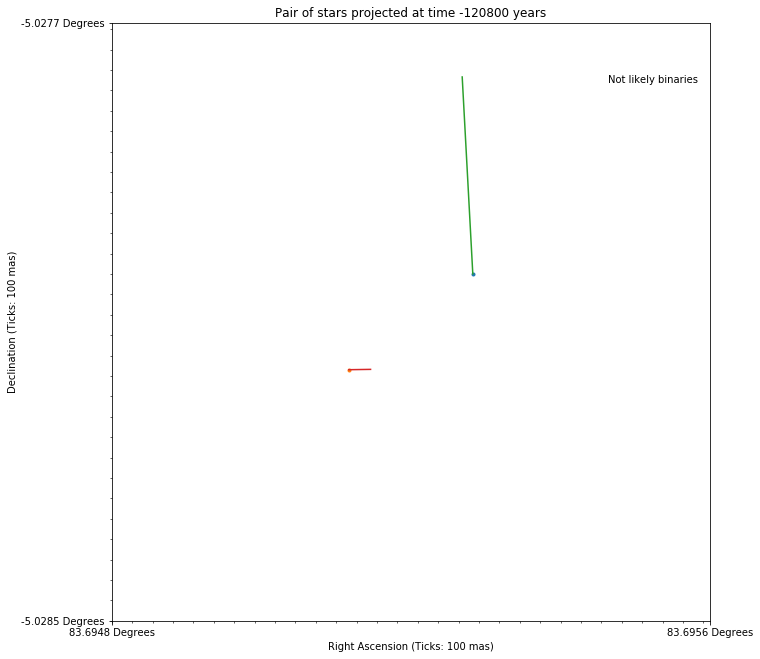

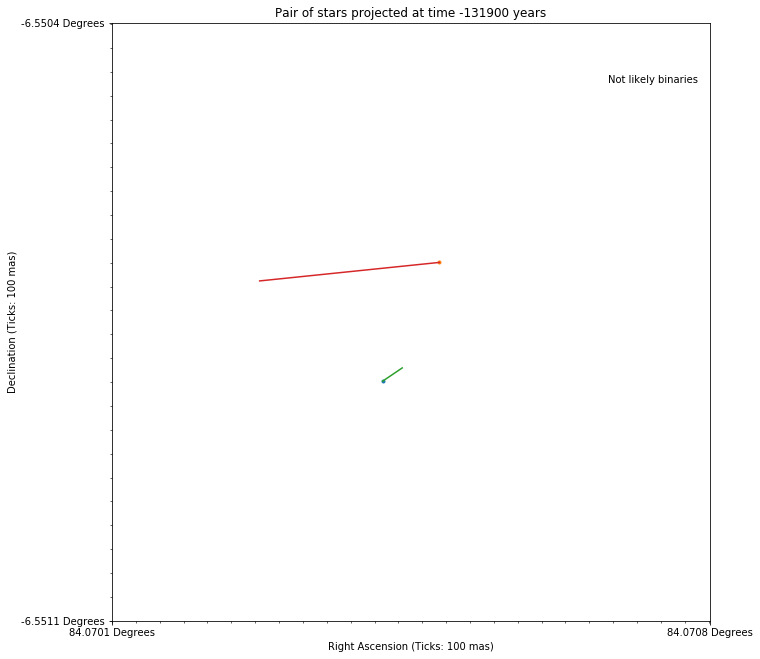

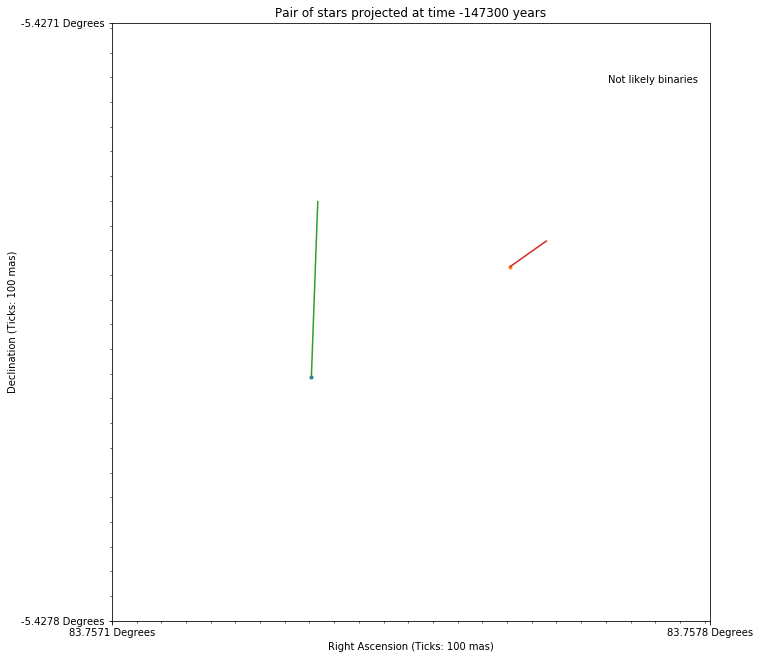

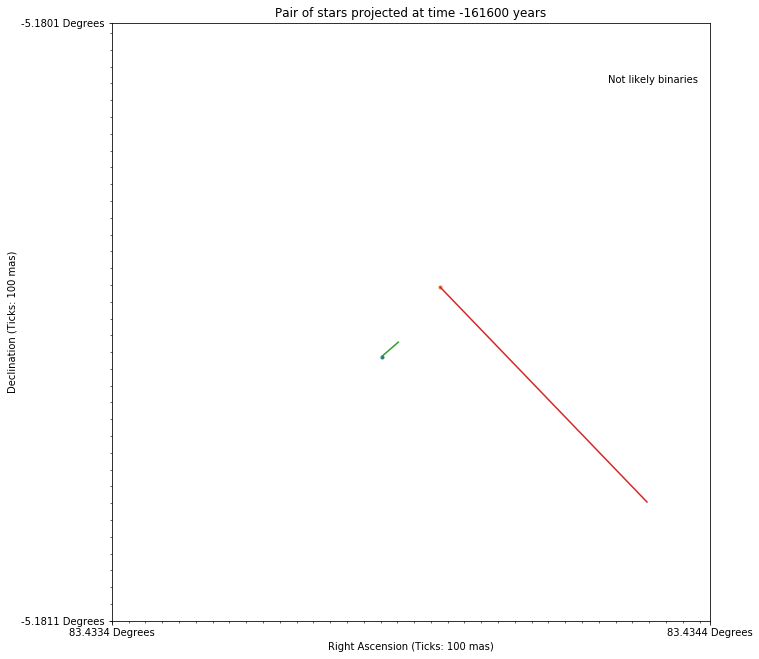

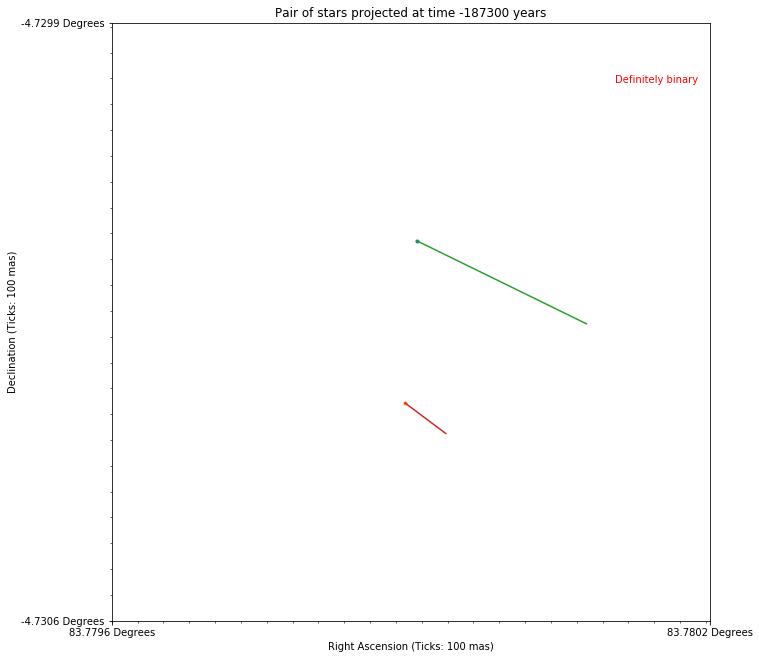

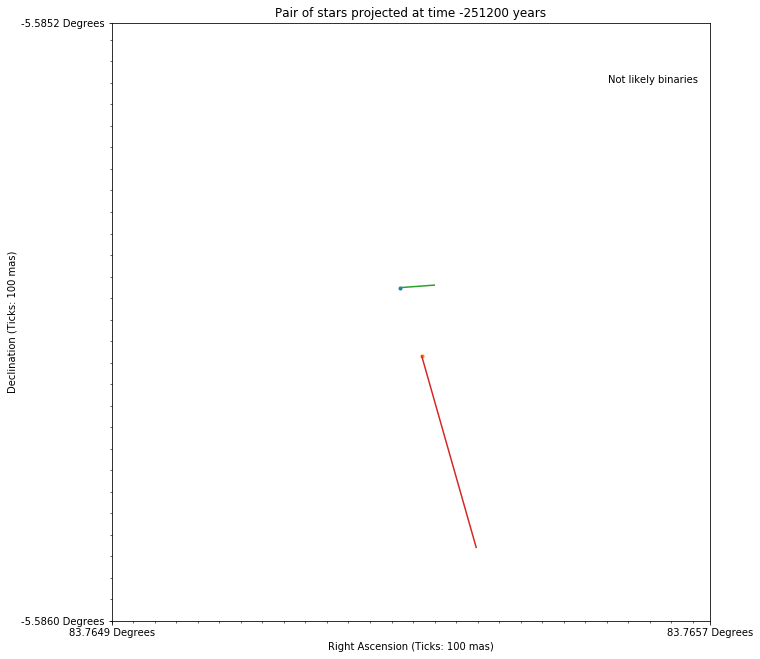

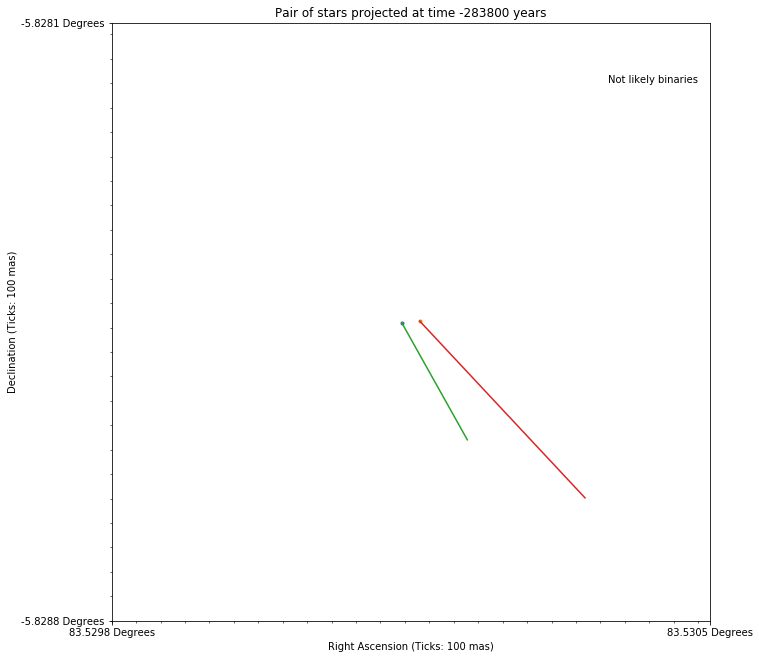

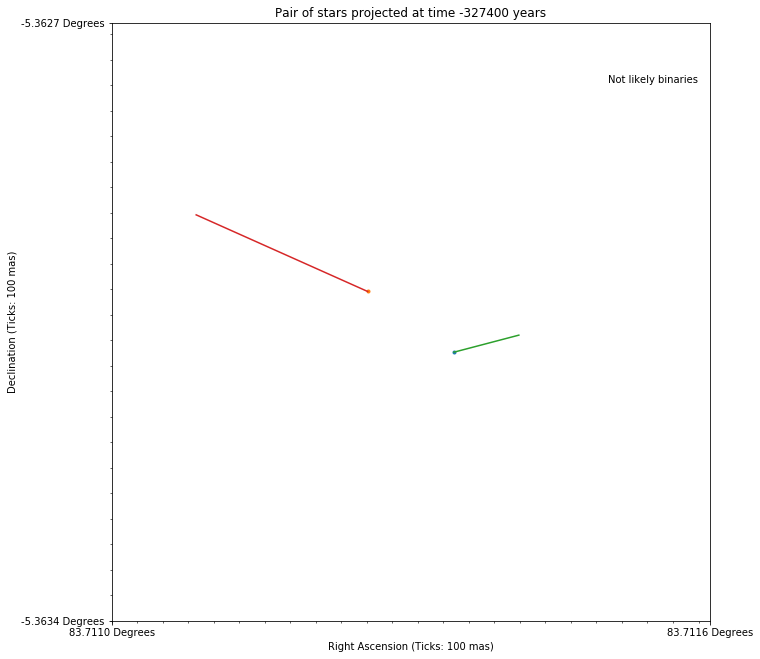

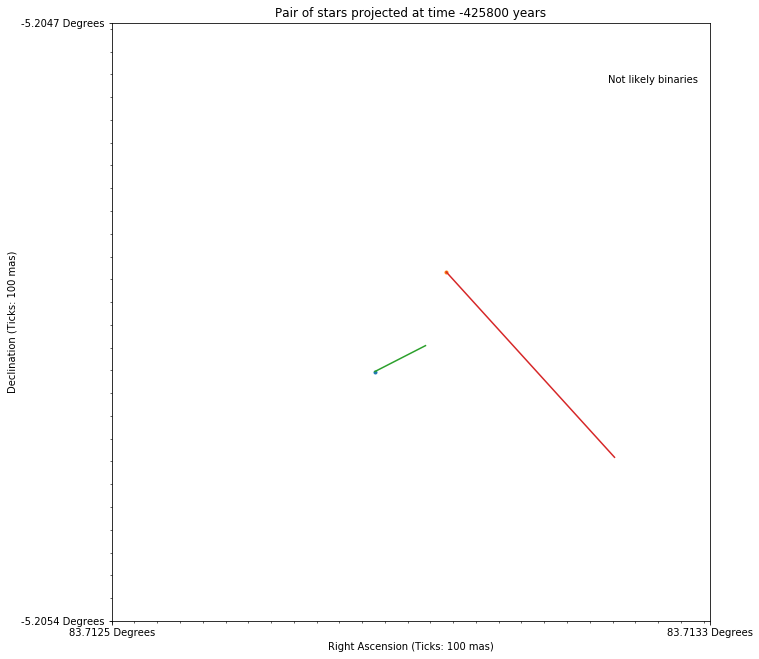

In [25]:
for rowNum in highlight:
    x1 = confEnhance['projected_ra1'][rowNum]
    y1 = confEnhance['projected_dec1'][rowNum]
    xvec1 = confEnhance['pmra1'][rowNum]
    yvec1 = confEnhance['pmdec1'][rowNum]
    
    
    x2 = confEnhance['projected_ra2'][rowNum]
    y2 = confEnhance['projected_dec2'][rowNum]
    xvec2 = confEnhance['pmra2'][rowNum]
    yvec2 = confEnhance['pmdec2'][rowNum]
    
    currentT = confEnhance['time'][rowNum]
    
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize = (11,11))

    axs.plot(x1, y1, '.')
    axs.plot(x2, y2, '.')
    #1/1000 - convert from mas to as - 1/3600 - convert from as to deg - 100 - vector for 100 years
    axs.plot([x1, x1 + (1/3600) * (1/1000) * 100 * xvec1], [y1, y1 + (1/3600) * (1/1000) * 100 * yvec1])
    axs.plot([x2, x2 + (1/3600) * (1/1000) * 100 * xvec2], [y2, y2 + (1/3600) * (1/1000) * 100 * yvec2])
    
    
    
    intx = .5 * (xvec1 /3600000 + xvec2 /3600000)
    inty = .5 * (yvec1/3600000 +  yvec2/3600000)
    
    
    ###NEW 
    """
    axs.plot([x1, x1 + (1/3600) * (1/1000) * 100 * xvec1 - intx * 100], 
             [y1, y1 + (1/3600) * (1/1000) * 100 * yvec1 - inty * 100], '--')
    axs.plot([x2, x2 + (1/3600) * (1/1000) * 100 * xvec2 - intx * 100],
             [y2, y2 + (1/3600) * (1/1000) * 100 * yvec2 - inty * 100], '--')
    """
    ###NEW
    
    xstops, ystops = getABox(np.array([x1,x2]), np.array([y1, y2]), np.array([xvec1, xvec2]), np.array([yvec1, yvec2]))
    axs.set_xlim(xstops)
    axs.set_ylim(ystops)
    
    axs.xaxis.set_ticks(np.arange(xstops[0], xstops[1], arcsec*.1), True)
    axs.xaxis.set_ticks(xstops, False)
    axs.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.4f' + ' Degrees'))

    axs.yaxis.set_ticks(np.arange(ystops[0], ystops[1], arcsec*.1), True)
    axs.yaxis.set_ticks(ystops, False)
    axs.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.4f' + ' Degrees'))

    axs.set_aspect('equal')
    
    axs.set_title('Pair of stars projected at time ' + str(currentT) + ' years')
    axs.set_xlabel('Right Ascension (Ticks: 100 mas)')
    axs.set_ylabel('Declination (Ticks: 100 mas)')
    
    #I'll take a stab at finding the radial separation, at first just using gaia 
    #parallax is in mas, so multiply by (1/1000) to convert to arcseconds
    pi1 = confEnhance['parallax1'][rowNum] / 1000
    pi2 = confEnhance['parallax2'][rowNum] / 1000
    
    ##DO ERRORS - errors are significant for parallax
    
    d1 = 1/pi1 #distance to star 1 in pc
    d2 = 1/pi2 #distance to star 2 in pc
    
    sep = np.abs(d2-d1)
    """
    if sep < 10: 
        plt.text(.9,.95, str(round(sep,3))+' pc',transform=axs.transAxes, color='r')
    else:
        plt.text(.9,.95, str(round(sep,3))+' pc',transform=axs.transAxes, color='b')"""
        
    #Also check if binaries:
    bin1 = confEnhance['isbin_1'][rowNum]
    bin2 = confEnhance['isbin_2'][rowNum]
    if bin1 == 3 or bin2 == 3:
        plt.text(.98,.9, 'Definitely binary',transform=axs.transAxes, color = 'r', horizontalalignment = 'right')
    elif bin1 == 2 or bin2 == 2:
        plt.text(.98, .9, 'Very likely binay', transform = axs.transAxes, color = 'r',horizontalalignment = 'right')
    elif bin1 == 1 or bin2 == 1:
        plt.text(.99, .9, 'Likely binary', transform = axs.transAxes, color = 'b',horizontalalignment = 'right') 
    else:
        plt.text(.98, .9, 'Not likely binaries', transform = axs.transAxes,horizontalalignment = 'right')
    plt.show()

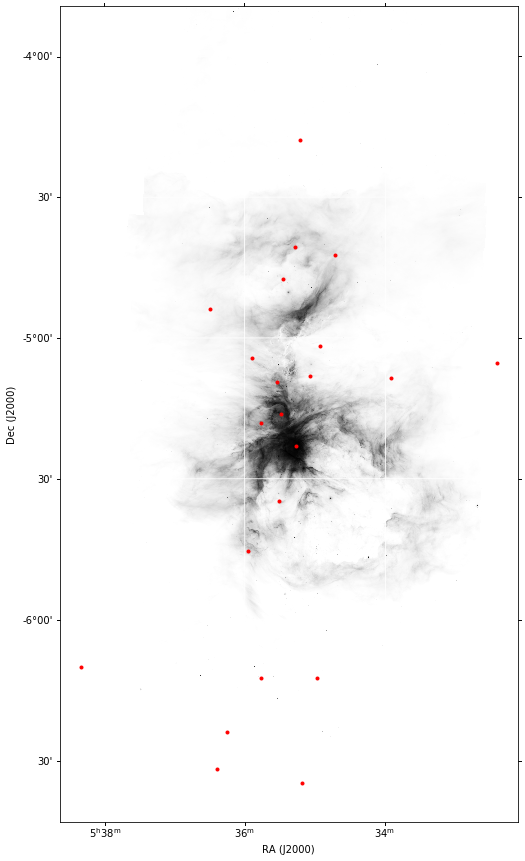

In [26]:
vec1 = SkyCoord(tab['ra1'] + (1/3600) * (1/1000) * 100 * tab['pmra1'],tab['dec1']+(1/3600)*(1/1000)*100*tab['pmdec1']
                ,unit = 'deg', frame = 'icrs')[highlight]
vec2 = SkyCoord(tab['ra2'] + (1/3600) * (1/1000) * 100 * tab['pmra2'],tab['dec2']+(1/3600)*(1/1000)*100*tab['pmdec2'],
                unit = 'deg', frame = 'icrs')[highlight]

filename = 'C:\\users\\sahal\\2018TrinaryWork\\TrinaryStarSearch\\Data\\ch4_merged_clean.fits'#get_pkg_data_filename('ch4_merged_clean.fits')

hdu = fits.open(filename)[0]
hdu.header['CTYPE1']='RA---TAN-SIP'
hdu.header['CTYPE2']='DEC--TAN-SIP'
wcs = WCS(hdu.header)

fig = plt.figure(figsize = (15,15))
ax=plt.subplot(projection = wcs)
#ax.set_figheight(10)
#x.set_figwidth(10)
#ax.subplot(projection=wcs)
ax.imshow(np.arctan(0.0001*(hdu.data-np.median(hdu.data))), origin='lower',cmap='binary',vmin=0)
ax.grid(color='white', ls='solid')
ax.set_xlabel('RA (J2000)')
ax.set_ylabel('Dec (J2000)')
#plt.gca().set_ylim(1500,6500)

#ax.plot(coordH1[1].ra, coordH1[1].dec, '.', transform=ax.get_transform('fk5'), color = 'r')
#ax.plot(coordH2[1].ra, coordH2[1].dec, '.', transform = ax.get_transform('fk5'), color = 'r')
bb = ax.get_transform('fk5')
vec1.transform_to('fk5')
vec2.transform_to('fk5')

ax.plot(coordH1.ra, coordH1.dec, '.', transform=ax.get_transform('icrs'), color = 'r')
ax.plot(coordH2.ra, coordH2.dec, '.', transform=ax.get_transform('icrs'), color = 'r')
#ax.plot(coordH2[1].ra+vec2.ra, coordH2[1].dec+vec2.dec, '.', transform = ax.get_transform('fk5'), color = 'r')
#plt.gca().set_ylim(4000,6800)
plt.show()

In [27]:
coord1 = SkyCoord(tab['ra1'],tab['dec1'], unit = 'deg', frame = 'icrs')[bothConf]
coordH1 = SkyCoord(tab['ra1'],tab['dec1'], pm_ra_cosdec = tab['pmra1']*u.rad/u.s,pm_dec = tab['pmdec1']*u.rad / u.s, unit = 'deg', frame = 'icrs')[highlight]
coord2 = SkyCoord(tab['ra2'], tab['dec2'], unit='deg', frame = 'icrs')[bothConf]
coordH2  = SkyCoord(tab['ra2'],tab['dec2'], unit = 'deg', frame = 'icrs')[highlight]

#coordH1.transform_to('fk5')

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN-SIP'  'DEC--TAN-SIP'  
CRVAL : 83.4643019345  -3.87517570367  
CRPIX : 2850.0  7809.0  
CD1_1 CD1_2  : -0.000339385442203  0.0  
CD2_1 CD2_2  : 0.0  0.000339385442203  
NAXIS : 3815  7963


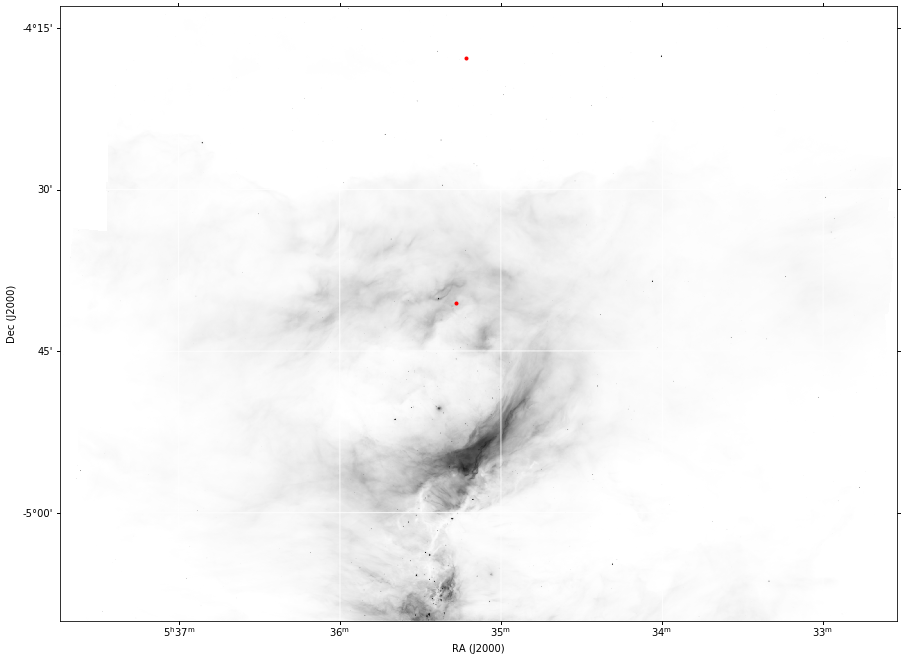

In [28]:
hdu = fits.open(filename)[0]
hdu.header['CTYPE1']='RA---TAN-SIP'
hdu.header['CTYPE2']='DEC--TAN-SIP'
wcs = WCS(hdu.header)
print(wcs)

fig = plt.figure(figsize = (15,15))
ax=plt.subplot(projection = wcs)
#ax.set_figheight(10)
#x.set_figwidth(10)
#ax.subplot(projection=wcs)
ax.imshow(np.arctan(0.0001*(hdu.data-np.median(hdu.data))), origin='lower',cmap='binary',vmin=0)
ax.grid(color='white', ls='solid')
ax.set_xlabel('RA (J2000)')
ax.set_ylabel('Dec (J2000)')
#plt.gca().set_ylim(1500,6500)

#ax.plot(coordH1[1].ra, coordH1[1].dec, '.', transform=ax.get_transform('fk5'), color = 'r')
#ax.plot(coordH2[1].ra, coordH2[1].dec, '.', transform = ax.get_transform('fk5'), color = 'r')
bb = ax.get_transform('fk5')
vec1.transform_to('fk5')
vec2.transform_to('fk5')

ax.plot(coordH1[1].ra, coordH1[1].dec, '.', transform=ax.get_transform('icrs'), color = 'r')
ax.plot(coordH2[1].ra, coordH2[1].dec, '.', transform=ax.get_transform('icrs'), color = 'r')
#ax.plot(coordH2[1].ra+vec2.ra, coordH2[1].dec+vec2.dec, '.', transform = ax.get_transform('fk5'), color = 'r')

#plt.arrow(coordH1[1].ra, coordH2[1].dec, coordH1[1].pm_ra_cosdec, coordH1[1].pm_dec, transform = ax.get_transform('fk5'))

ax.set_ylim(4000,6800)
plt.show()

In [29]:
proj1 = SkyCoord(tab['projected_ra1'],tab['projected_dec1'], unit='deg',frame='icrs')[highlight]
proj2 = SkyCoord(tab['projected_ra2'], tab['projected_dec2'], unit = 'deg', frame = 'icrs')[highlight]

projvec1 = [tab['projected_ra1'][highlight] + tab['pmra1'][highlight]/1000 /3600 *100, tab['projected_dec1'][highlight]+tab['pmdec1'][highlight]/1000/3600]
projvec2 = [tab['projected_ra2'][highlight] + tab['pmra2'][highlight]/1000 /3600 * 100, tab['projected_dec2'][highlight]+tab['pmdec2'][highlight]/1000/3600]
pOff1 = SkyCoord(projvec1[0], projvec1[1], unit = 'deg', frame = 'icrs')
pOff2 = SkyCoord(projvec2[0], projvec2[1], unit = 'deg', frame = 'icrs')

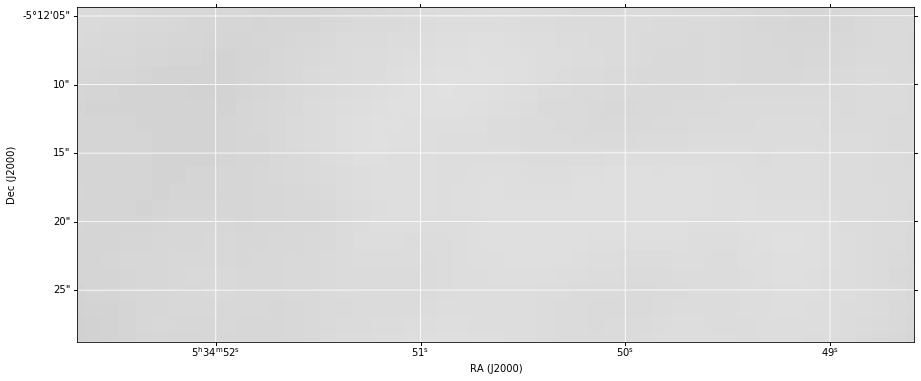

1


In [30]:
fig = plt.figure(figsize = (15,15))
ax=plt.subplot(projection = wcs)
#ax.set_figheight(10)
#ax.set_figwidth(10)
#ax.subplot(projection=wcs)
i = 1
ax.imshow(np.arctan(0.0001*(hdu.data-np.median(hdu.data))), origin='lower',cmap='binary',vmin=0)
ax.grid(color='white', ls='solid')
ax.set_xlabel('RA (J2000)')
ax.set_ylabel('Dec (J2000)')
#plt.gca().set_ylim(1500,6500)

bb = ax.get_transform('icrs')
vec1.transform_to('icrs')
vec2.transform_to('icrs')

ax.plot(proj1.ra[i], proj1.dec[i], '.', transform=ax.get_transform('icrs'), color = 'r')
ax.plot(proj2.ra[i], proj2.dec[i], '.', transform=ax.get_transform('icrs'), color = 'r')
#ax.plot(coordH2[1].ra+vec2.ra, coordH2[1].dec+vec2.dec, '.', transform = ax.get_transform('icrs'), color = 'r')
#plt.arrow(coordH1[1].ra, coordH2[1].dec, coordH1[1].pm_ra_cosdec, coordH1[1].pm_dec, transform = ax.get_transform('icrs'))
ax.plot(pOff1.ra[i],pOff1.dec[i], '.', transform = ax.get_transform('icrs'), color = 'b')
ax.plot(pOff2.ra[i],pOff2.dec[i], '.', transform = ax.get_transform('icrs'), color = 'b')
ax.set_xlim(2100, 2150)
ax.set_ylim(3880,3900)
plt.show()
print(i)

#  High PM confirmed members that are not necessarily paired up:

In [22]:
#Make table from our .fits file of Gaia dr2 data
hdul=fits.open('c:\\users\\sahal\\2018TrinaryWork\\TrinaryStarSearch\\Data\\conf_in_gaiadr2_oriontables.fits')
data = hdul[1].data
gTab = Table([data['ra_1'], data['dec_1'], data['pmra'], data['pmdec'],data['parallax'], data['radial_velocity'],
                 data['phot_g_mean_mag'],data['bp_rp'], data['pmra_error'], data['pmdec_error']],
                names = ('ra', 'dec', 'pmra', 'pmdec', 'parallax', 'rv', 'abs_g','bp_rp', 'pmra_err', 'pmdec_err'))
Mg_all = np.array([G + 5 - 5*(np.log10(1000/p)) for G, p in zip(gTab['abs_g'], gTab['parallax'])])
ii=[]

for i in range(len(gTab)):
    if( (Mg_all[i]<2.46*(gTab['bp_rp'][i])+2.76 and .3<(gTab['bp_rp'][i])<1.8)
       or (Mg_all[i]<2.8*(gTab['bp_rp'][i])+2.16 and 1.8<(gTab['bp_rp'][i]))):
        ii.append(i)
gTab = gTab[ii]

gaiaAll = Table(data)[np.where((gaiaAll['source_id']!=-9223372036854775808))[0]]
gaiaTab=gaiaAll[ii]
# gaiaTab.rename_column('ra_1', 'ra')
# gaiaTab.rename_column('dec_1', 'dec')
# gaiaTab.rename_column('pmra_error', 'pmra_err')
# gaiaTab.rename_column('pmdec_error', 'pmdec_err')#gaiaTab
gaiaTab

gTab = gaiaTab[:] #Remnant of bad coding habits

gaiaAll

<Table length=2962>
     source_id              designation          ...        DEC_2       
       int64                   str28             ...       float64      
------------------- ---------------------------- ... -------------------
3215908444223975040 Gaia DR2 3215908444223975040 ...  -3.546636951560632
3215934695063940352 Gaia DR2 3215934695063940352 ... -3.5598510277869675
3215665658310935296 Gaia DR2 3215665658310935296 ...  -4.098007020250057
3215667994774624000 Gaia DR2 3215667994774624000 ...  -4.135372161865234
3215662394137270528 Gaia DR2 3215662394137270528 ...  -4.125016212463379
3215672255382161408 Gaia DR2 3215672255382161408 ...  -4.029011798179367
3215671293309507584 Gaia DR2 3215671293309507584 ...          -4.0977778
3209940226388432384 Gaia DR2 3209940226388432384 ... -3.6268760571605347
3215880578476200064 Gaia DR2 3215880578476200064 ... -3.7558309009009654
3215852987606348672 Gaia DR2 3215852987606348672 ...          -4.1104722
                ...                          ... ...                 ...
3016099006470651520 Gaia DR2 3016099006470651520 ... -7.1582231521606445
3016106389518168576 Gaia DR2 3016106389518168576 ...  -7.031267166137695
3016101652170495104 Gaia DR2 3016101652170495104 ...  -7.119676116992941
3016102438149172096 Gaia DR2 3016102438149172096 ...  -7.104133129119873
3016106114640322560 Gaia DR2 3016106114640322560 ...  -7.046414320142116
3016105633605578240 Gaia DR2 3016105633605578240 ...          -7.0768889
3016091511751904256 Gaia DR2 3016091511751904256 ...  -7.112220764160156
3016102781746112384 Gaia DR2 3016102781746112384 ...  -7.095792850308482
3016106870554572288 Gaia DR2 3016106870554572288 ...  -7.016249282846324
3016099448851632256 Gaia DR2 3016099448851632256 ...  -7.112036228179932

In [19]:
gTab

<Table length=1867>
     source_id              designation          ...        DEC_2       
       int64                   str28             ...       float64      
------------------- ---------------------------- ... -------------------
3215934695063940352 Gaia DR2 3215934695063940352 ... -3.5598510277869675
3215667994774624000 Gaia DR2 3215667994774624000 ...  -4.135372161865234
3215672255382161408 Gaia DR2 3215672255382161408 ...  -4.029011798179367
3215671293309507584 Gaia DR2 3215671293309507584 ...          -4.0977778
3209940226388432384 Gaia DR2 3209940226388432384 ... -3.6268760571605347
3215880578476200064 Gaia DR2 3215880578476200064 ... -3.7558309009009654
3215852987606348672 Gaia DR2 3215852987606348672 ...          -4.1104722
3215872396561733504 Gaia DR2 3215872396561733504 ... -3.8642637866890976
3215856732817863168 Gaia DR2 3215856732817863168 ...  -4.035978785002408
3215662943892925696 Gaia DR2 3215662943892925696 ...          -4.1982778
                ...                          ... ...                 ...
3016106118936392960 Gaia DR2 3016106118936392960 ...  -7.044552803039551
3016106909210376704 Gaia DR2 3016106909210376704 ...  -7.040532735943178
3016106806131161088 Gaia DR2 3016106806131161088 ...  -7.028787136077881
3016095501777333376 Gaia DR2 3016095501777333376 ...          -7.1752778
3016099006470651520 Gaia DR2 3016099006470651520 ... -7.1582231521606445
3016106389518168576 Gaia DR2 3016106389518168576 ...  -7.031267166137695
3016101652170495104 Gaia DR2 3016101652170495104 ...  -7.119676116992941
3016091511751904256 Gaia DR2 3016091511751904256 ...  -7.112220764160156
3016106870554572288 Gaia DR2 3016106870554572288 ...  -7.016249282846324
3016099448851632256 Gaia DR2 3016099448851632256 ...  -7.112036228179932

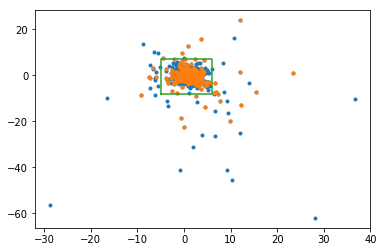

In [35]:
plt.plot(gaiaAll['pmra'],gaiaAll['pmdec'], '.')
plt.plot(gTab['pmra'], gTab['pmdec'], '.')
plt.plot([-5,-5, 6, 6, -5],[-8,7,7,-8, -8])

In [32]:
xfilt = np.where((gTab['pmra'] < 6) & (gTab['pmra'] > -5))[0]
yfilt = np.where((gTab['pmdec'] < 7) & (gTab['pmdec'] > -8))[0]
filt = np.intersect1d(xfilt, yfilt)
loosemask = np.arange(len(gTab))
loosemask = np.delete(loosemask, filt)

26


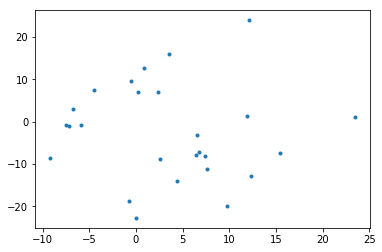

In [33]:
plt.plot(gTab['pmra'][loosemask], gTab['pmdec'][loosemask],'.')
print(len(loosemask))

In [35]:
coords = SkyCoord(gTab['ra'][loosemask], gTab['dec'][loosemask], unit = 'deg', frame = 'icrs')

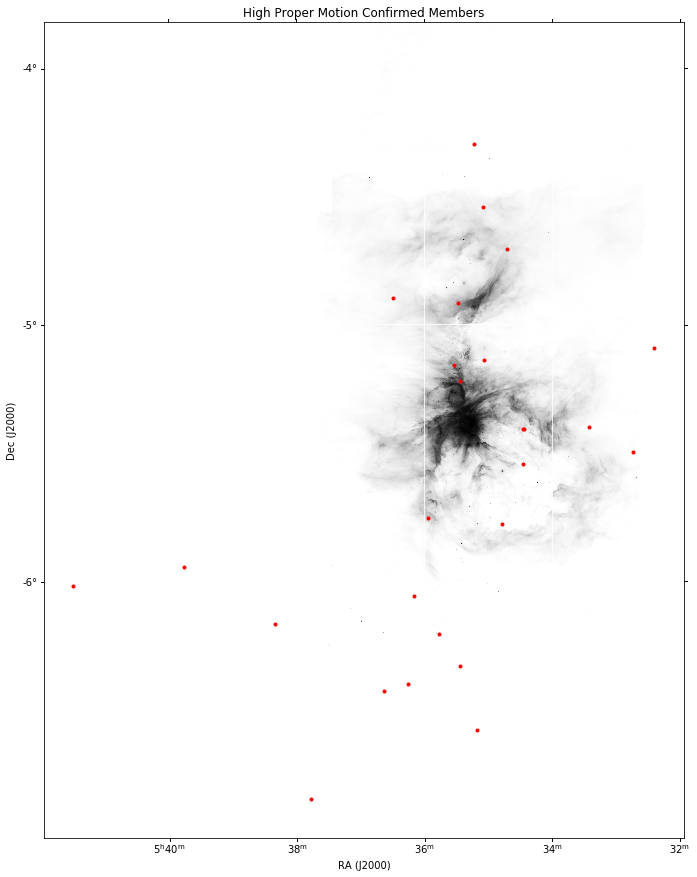

In [36]:
hdu = fits.open(filename)[0]
hdu.header['CTYPE1']='RA---TAN-SIP'
hdu.header['CTYPE2']='DEC--TAN-SIP'
wcs = WCS(hdu.header)

fig = plt.figure(figsize = (15,15))
ax=plt.subplot(projection = wcs)
#ax.set_figheight(10)
#x.set_figwidth(10)
#ax.subplot(projection=wcs)
ax.imshow(np.arctan(0.0001*(hdu.data-np.median(hdu.data))), origin='lower',cmap='binary',vmin=0)
ax.grid(color='white', ls='solid')
ax.set_xlabel('RA (J2000)')
ax.set_ylabel('Dec (J2000)')
#plt.gca().set_ylim(1500,6500)

#ax.plot(coordH1[1].ra, coordH1[1].dec, '.', transform=ax.get_transform('fk5'), color = 'r')
#ax.plot(coordH2[1].ra, coordH2[1].dec, '.', transform = ax.get_transform('fk5'), color = 'r')
bb = ax.get_transform('fk5')
vec1.transform_to('fk5')
vec2.transform_to('fk5')

ax.plot(coords.ra, coords.dec, '.', transform=ax.get_transform('icrs'), color = 'r')

#plt.arrow(coordH1[1].ra, coordH2[1].dec, coordH1[1].pm_ra_cosdec, coordH1[1].pm_dec, transform = ax.get_transform('fk5'))

#ax.set_ylim(4000,6800)
ax.set_title('High Proper Motion Confirmed Members')


#sk = SkyCoord(sel['ra_1']*u.deg,sel['dec_1']*u.deg,frame = 'icrs')
#plt.plot(sk.ra,sk.dec,'.', transform=ax.get_transform('world'))

plt.show()

# Plotting vectors overlaid on the entirety of the system

In [37]:
filename = 'C:\\users\\sahal\\2018TrinaryWork\\TrinaryStarSearch\\Data\\ch4_merged_clean.fits'
hdu = fits.open(filename)[0]
hdu.header['CTYPE1']='RA---TAN-SIP'
hdu.header['CTYPE2']='DEC--TAN-SIP'
wcs = WCS(hdu.header)
print(wcs)

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN-SIP'  'DEC--TAN-SIP'  
CRVAL : 83.4643019345  -3.87517570367  
CRPIX : 2850.0  7809.0  
CD1_1 CD1_2  : -0.000339385442203  0.0  
CD2_1 CD2_2  : 0.0  0.000339385442203  
NAXIS : 3815  7963


In [38]:
#proj1 = SkyCoord(tab['projected_ra1'],tab['projected_dec1'], unit='deg',frame='icrs')[highlight]
#proj2 = SkyCoord(tab['projected_ra2'], tab['projected_dec2'], unit = 'deg', frame = 'icrs')[highlight]

tmstp = 100000

projvec1 = [tab['projected_ra1'][highlight] + tab['pmra1'][highlight]/1000 /3600 *tmstp, tab['projected_dec1'][highlight]+tab['pmdec1'][highlight]/1000/3600 * tmstp]
projvec2 = [tab['projected_ra2'][highlight] + tab['pmra2'][highlight]/1000 /3600 * tmstp, tab['projected_dec2'][highlight]+tab['pmdec2'][highlight]/1000/3600 * tmstp]

baseRa1 = tab['projected_ra1'][highlight]
baseDec1 = tab['projected_dec1'][highlight]
baseRa2 = tab['projected_ra2'][highlight]
baseDec2 = tab['projected_dec2'][highlight]

c = np.zeros(2 * len(highlight))
c[0::2] = baseRa1
c[1::2]= projvec1[0]
d = np.zeros(2 * len(highlight))
d[0::2] = baseDec1
d[1::2] = projvec1[1]

e = np.zeros(2 * len(highlight))
e[0::2] = baseRa2
e[1::2] = projvec2[0]
f = np.zeros(2 * len(highlight))
f[0::2] = baseDec2
f[1::2] = projvec2[1]

p1 = SkyCoord(c, d, unit = 'deg', frame = 'icrs')
p2 = SkyCoord(e, f, unit = 'deg', frame = 'icrs')
#NOTE this creates skycoordinates where every first entry is the projected position, and every second entry is the
#projected position offset by some chunk of space

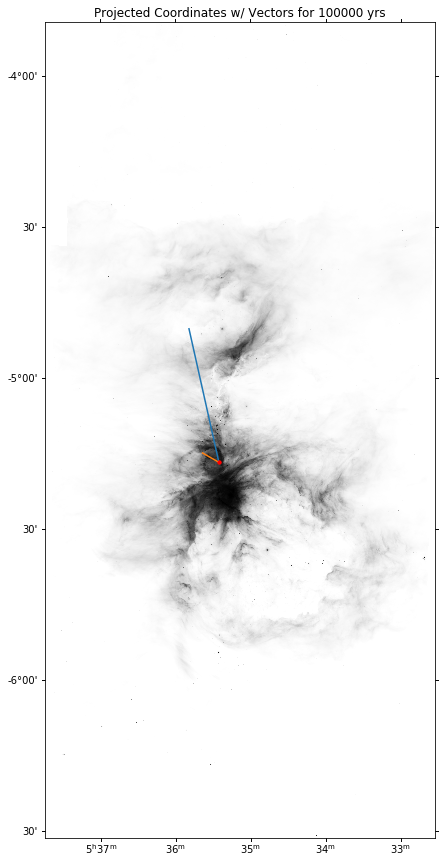

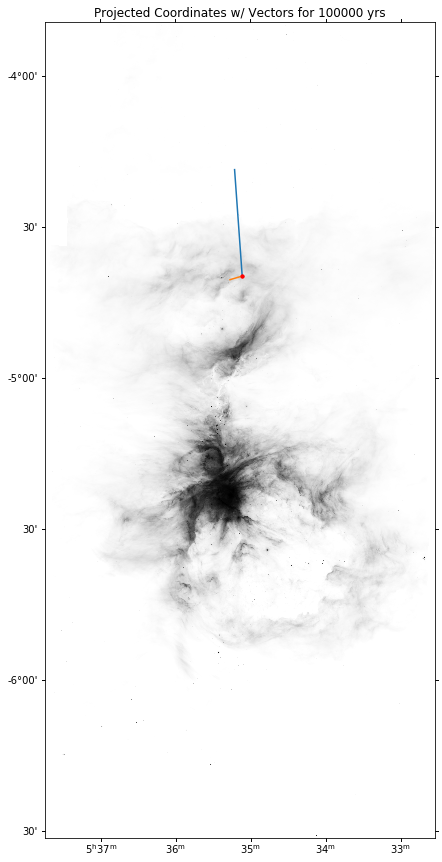

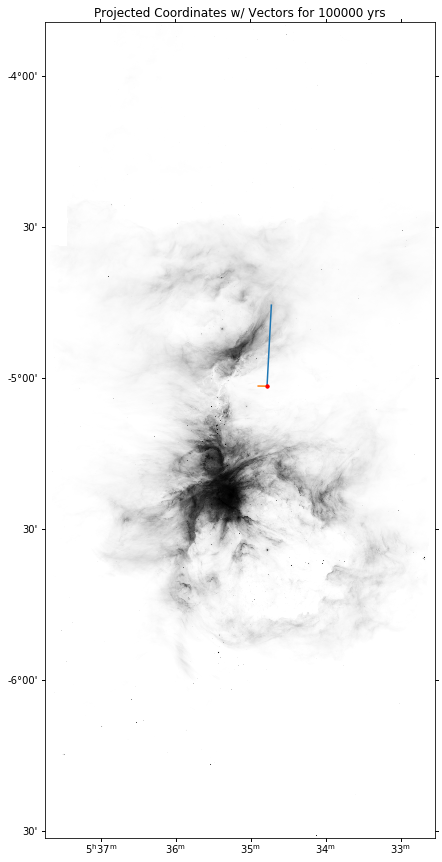

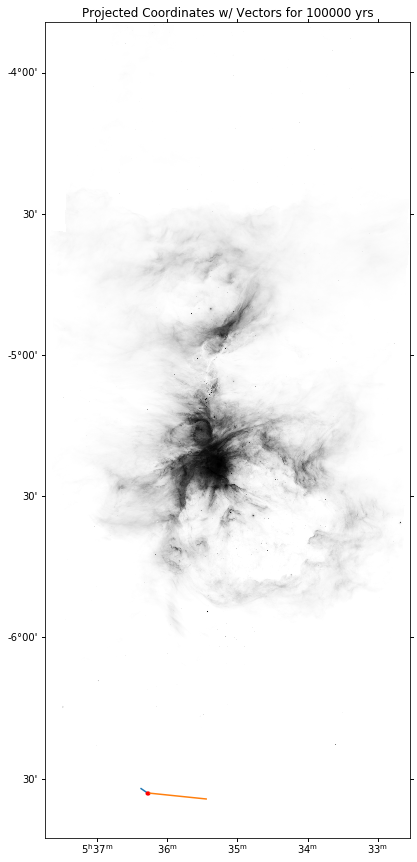

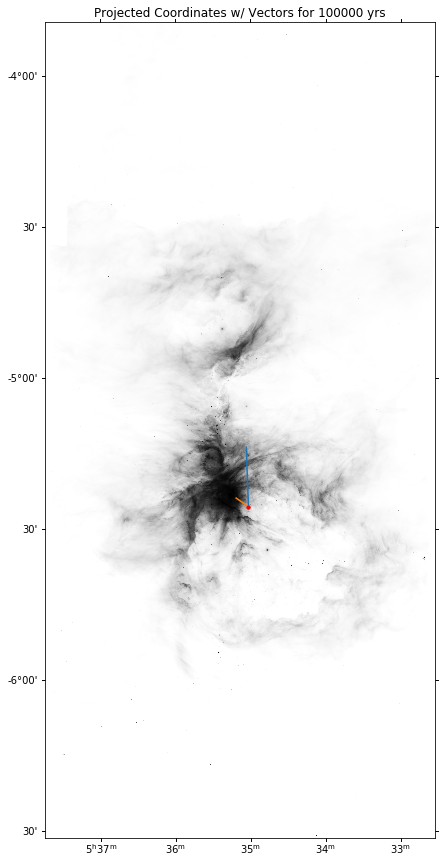

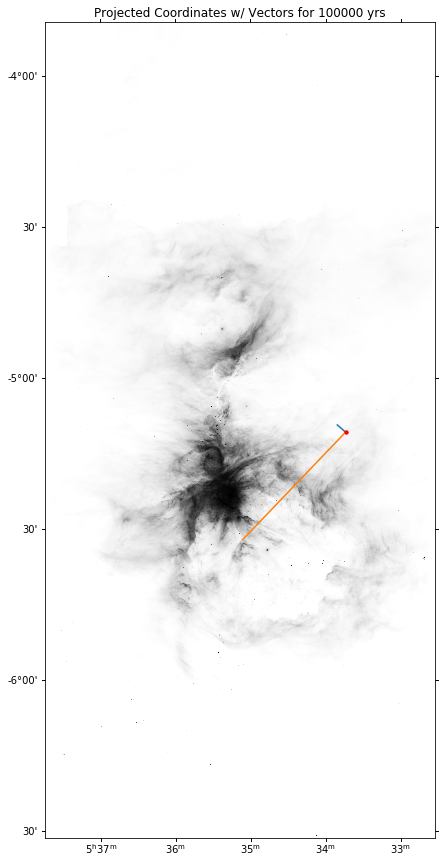

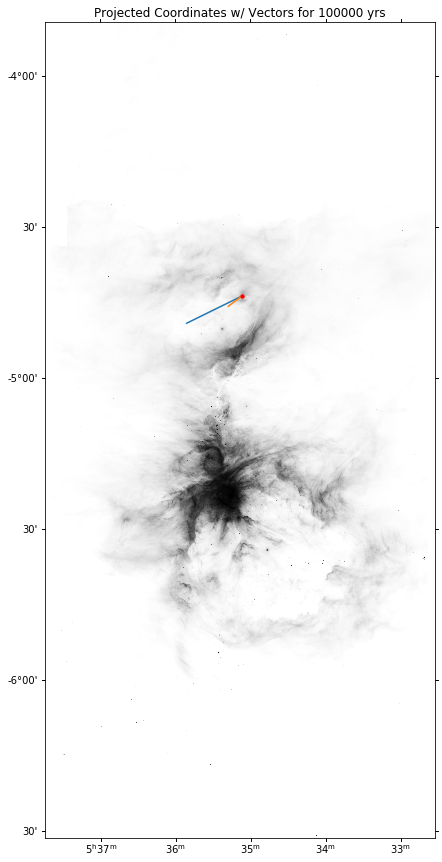

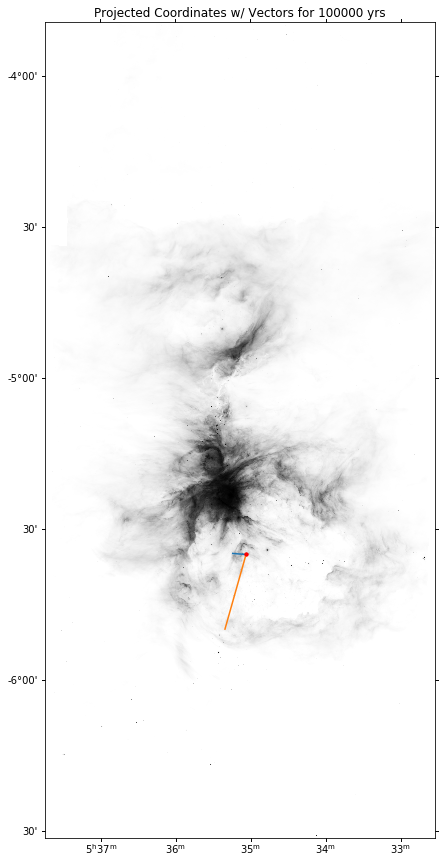

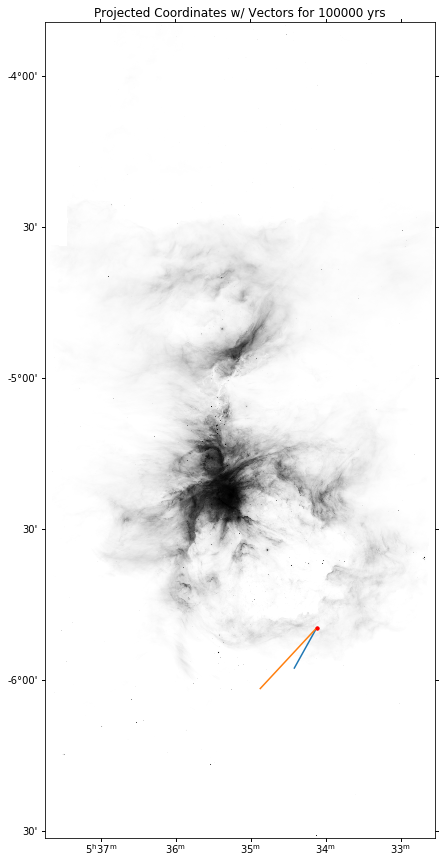

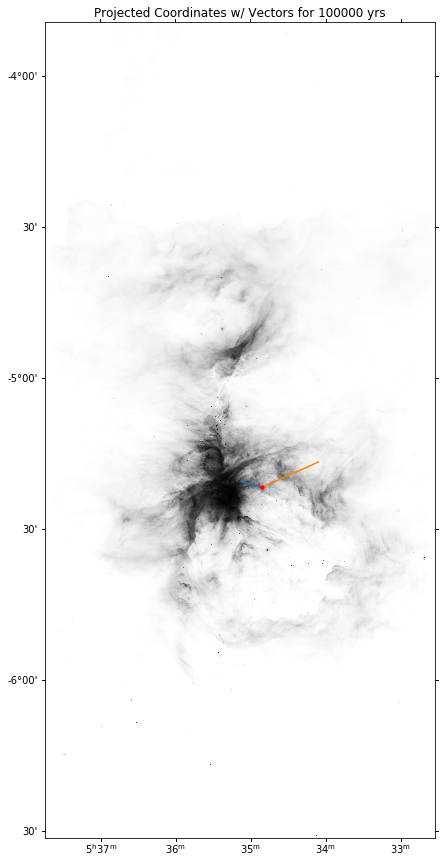

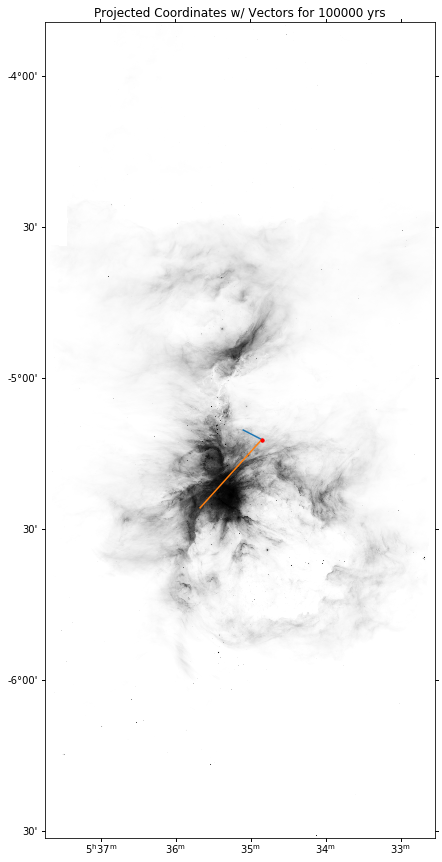

In [39]:
for it in range(len(highlight)):
    anchor = 2 * it
    off = anchor + 2 #the plus 2 accounts for python's indexing

    fig = plt.figure(figsize=(15, 15))
    ax = plt.subplot(projection = wcs)
    ax.imshow(np.arctan(0.0001*(hdu.data-np.median(hdu.data))), origin='lower',cmap='binary',vmin=0)

    plt.plot(p1[anchor:off].ra, p1[anchor:off].dec, transform = ax.get_transform('icrs'))
    plt.plot(p1[anchor].ra, p1[anchor].dec, '.', transform = ax.get_transform('icrs'), color = 'r')
    
    plt.plot(p2[anchor:off].ra, p2[anchor:off].dec, transform = ax.get_transform('icrs'))
    plt.plot(p2[anchor].ra, p2[anchor].dec, '.', transform = ax.get_transform('icrs'), color = 'r')
    title = 'Projected Coordinates w/ Vectors for ' + str(tmstp) + ' yrs'
    ax.set_title(title)

    xx, yy = (skycoord_to_pixel(p1[anchor], wcs, mode = 'wcs'))
    
    #ax.set_xlim(xx - 1000, xx + 1000)
    #ax.set_ylim(yy - 1000,yy + 1000)
    
    plt.show()

In [40]:
baseRa1 = tab['ra1'][highlight]
baseDec1 = tab['dec1'][highlight]
baseRa2 = tab['ra2'][highlight]
baseDec2 = tab['dec2'][highlight]

projvec1 = [baseRa1 + tab['pmra1'][highlight]/1000 /3600 *tmstp, baseDec1+tab['pmdec1'][highlight]/1000/3600 * tmstp]
projvec2 = [baseRa2 + tab['pmra2'][highlight]/1000 /3600 * tmstp, baseDec2+tab['pmdec2'][highlight]/1000/3600 * tmstp]

cc = np.zeros(2 * len(highlight))
cc[0::2] = baseRa1
cc[1::2]= projvec1[0]
dd = np.zeros(2 * len(highlight))
dd[0::2] = baseDec1
dd[1::2] = projvec1[1]

ee = np.zeros(2 * len(highlight))
ee[0::2] = baseRa2
ee[1::2] = projvec2[0]
ff = np.zeros(2 * len(highlight))
ff[0::2] = baseDec2
ff[1::2] = projvec2[1]

pNow1 = SkyCoord(cc, dd, unit = 'deg', frame = 'icrs')
pNow2 = SkyCoord(ee, ff, unit = 'deg', frame = 'icrs')
#NOTE this creates skycoordinates where every first entry is the current position, and every second entry is the
#projected position offset by some chunk of space

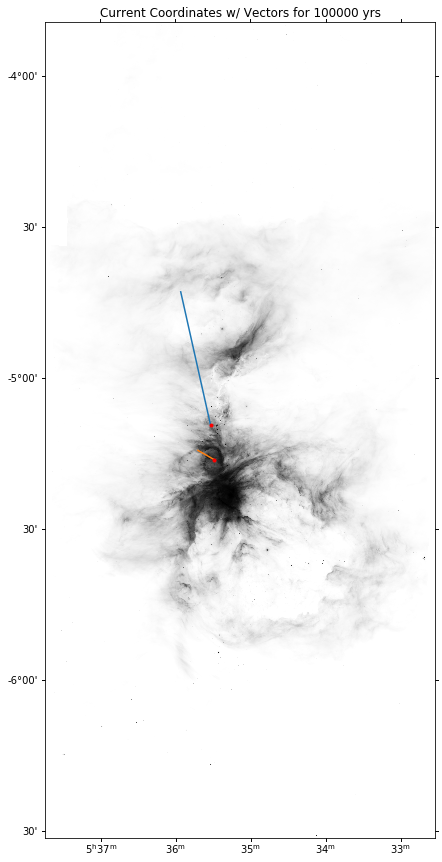

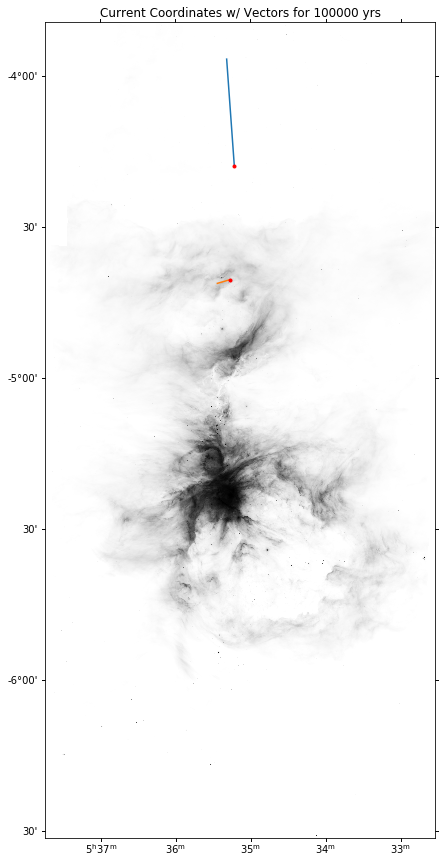

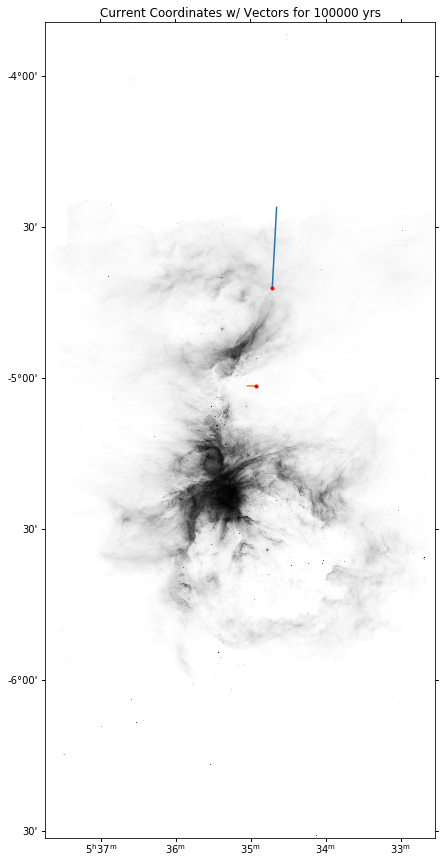

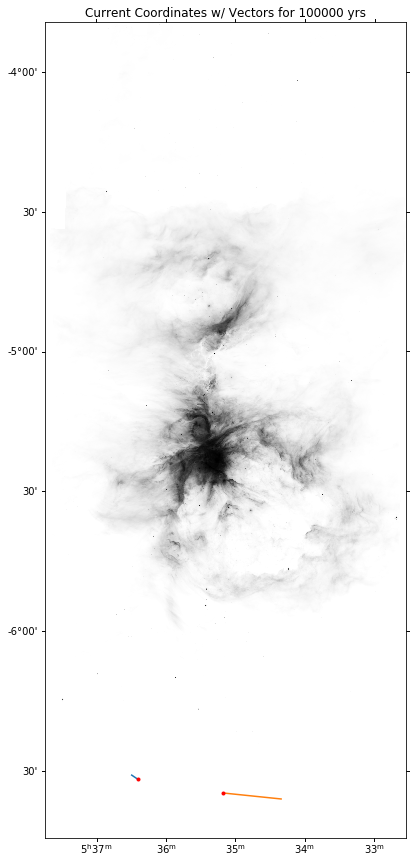

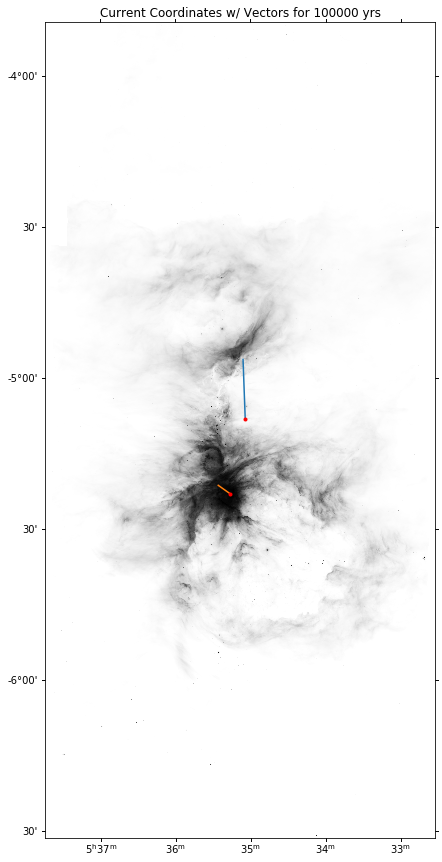

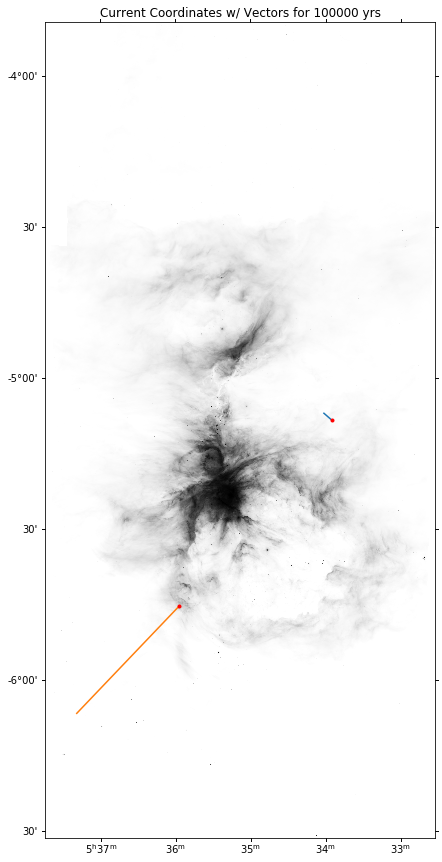

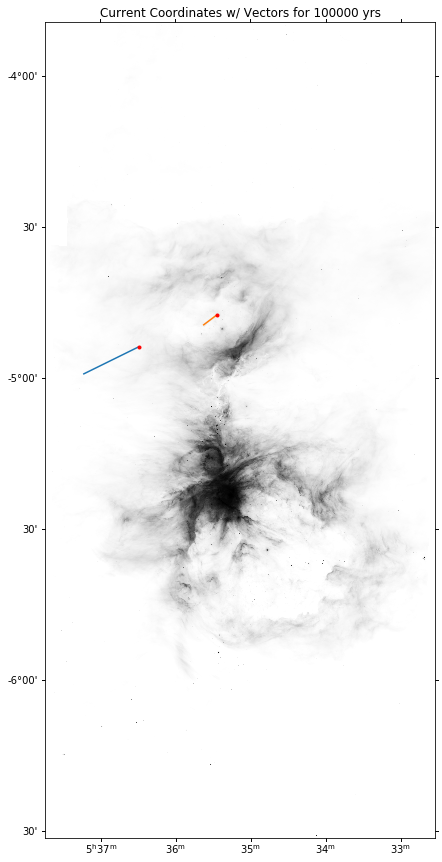

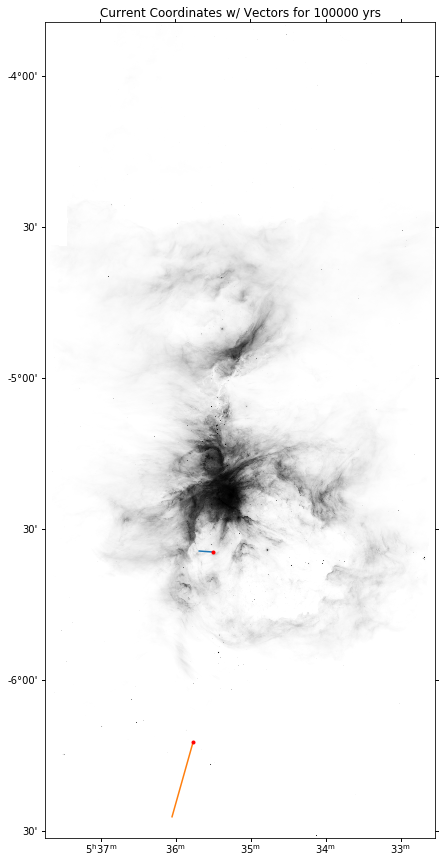

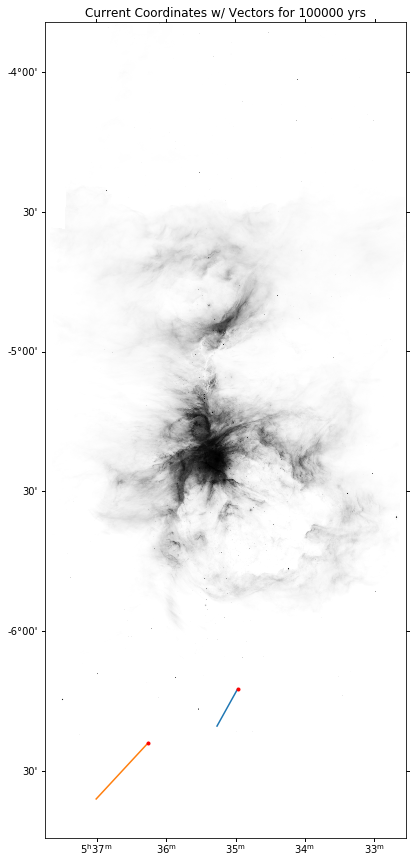

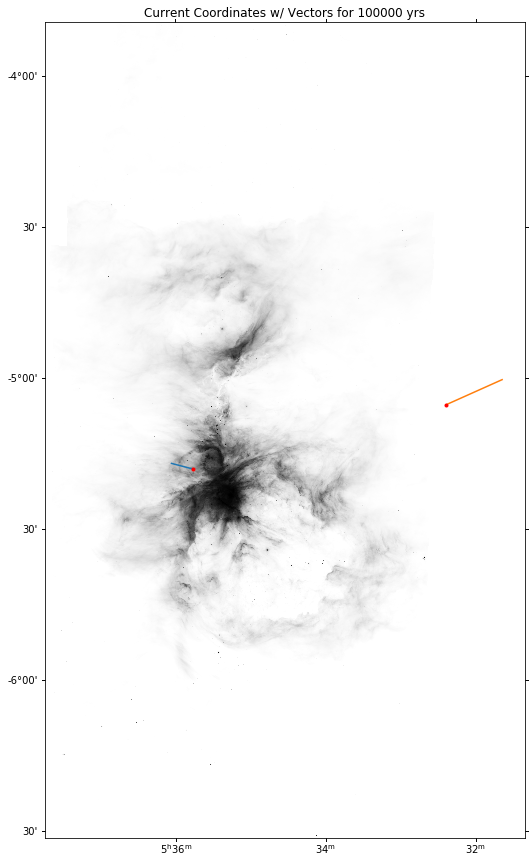

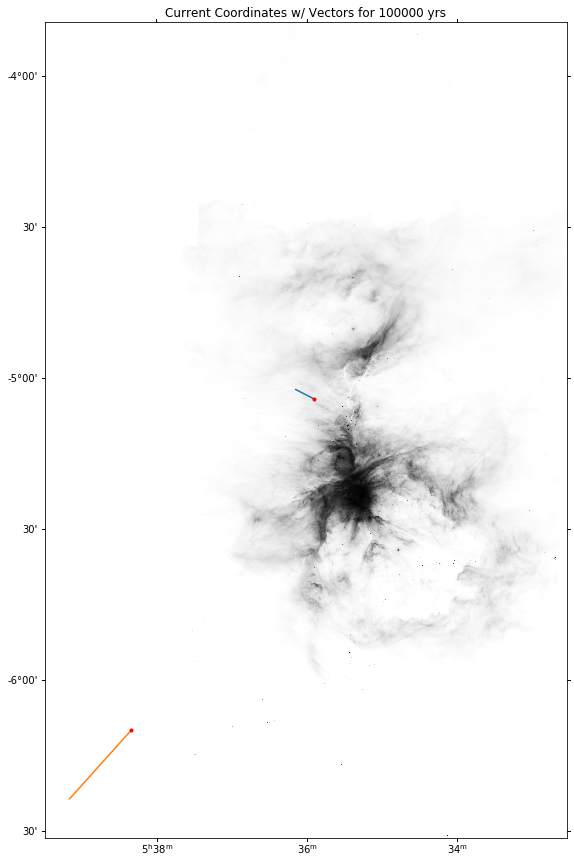

In [41]:
for it in range(len(highlight)):
    anchor = 2 * it
    off = anchor + 2 #the plus 2 accounts for python's indexing

    fig = plt.figure(figsize=(15, 15))
    ax = plt.subplot(projection = wcs)
    ax.imshow(np.arctan(0.0001*(hdu.data-np.median(hdu.data))), origin='lower',cmap='binary',vmin=0)

    plt.plot(pNow1[anchor:off].ra, pNow1[anchor:off].dec, transform = ax.get_transform('icrs'))
    plt.plot(pNow1[anchor].ra, pNow1[anchor].dec, '.', transform = ax.get_transform('icrs'), color = 'r')
    
    plt.plot(pNow2[anchor:off].ra, pNow2[anchor:off].dec, transform = ax.get_transform('icrs'))
    plt.plot(pNow2[anchor].ra, pNow2[anchor].dec, '.', transform = ax.get_transform('icrs'), color = 'r')
    title = 'Current Coordinates w/ Vectors for ' + str(tmstp) + ' yrs'
    ax.set_title(title)

    xx, yy = (skycoord_to_pixel(pNow1[anchor], wcs, mode = 'wcs'))
    
    #ax.set_xlim(xx - 1000, xx + 1000)
    #ax.set_ylim(yy - 1000,yy + 1000)
    
    #print(tab['time'][highlight[it]])
    
    plt.show()

In [42]:
#Now we go back to the data from Gaia, gTab
gtmstp = 100000 #timestep for just gaia
baseRa1 = gTab['ra'][loosemask]
baseDec1 = gTab['dec'][loosemask]

projvec1 = [baseRa1 + gTab['pmra'][loosemask]/1000 /3600 *gtmstp, baseDec1+gTab['pmdec'][loosemask]/1000/3600 * gtmstp]


ccc = np.zeros(2 * len(loosemask))
ccc[0::2] = baseRa1
ccc[1::2]= projvec1[0]
ddd = np.zeros(2 * len(loosemask))
ddd[0::2] = baseDec1
ddd[1::2] = projvec1[1]

pGaia1 = SkyCoord(ccc, ddd, unit = 'deg', frame = 'icrs')
print(len(pGaia1))
print(len(loosemask))

52
26


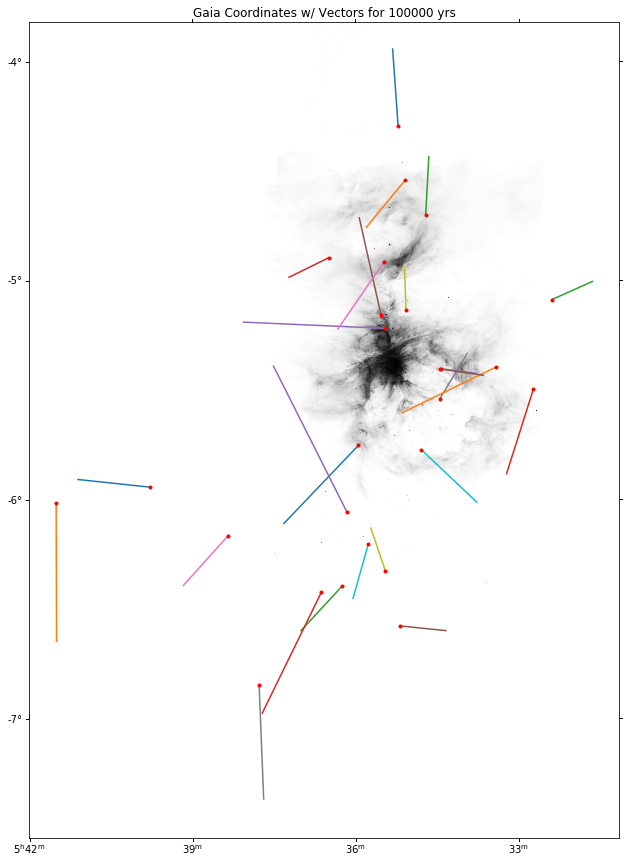

In [43]:
fig = plt.figure(figsize=(15, 15))
ax = plt.subplot(projection = wcs)
ax.imshow(np.arctan(0.0001*(hdu.data-np.median(hdu.data))), origin='lower',cmap='binary',vmin=0)

for it in range(len(loosemask)):
    anchor = 2 * it
    off = anchor + 2 #the plus 2 accounts for python's indexing



    plt.plot(pGaia1[anchor:off].ra, pGaia1[anchor:off].dec, transform = ax.get_transform('world'))
    plt.plot(pGaia1[anchor].ra, pGaia1[anchor].dec, '.', transform = ax.get_transform('world'), color = 'r')

    title = 'Gaia Coordinates w/ Vectors for ' + str(gtmstp) + ' yrs'
    ax.set_title(title)

    xx, yy = (skycoord_to_pixel(pGaia1[anchor], wcs, mode = 'wcs'))
    
    
    #ax.set_xlim(xx - 1000, xx + 1000)
    #ax.set_ylim(yy - 1000,yy + 1000)
    
    #print(tab['time'][highlight[it]])

    
xLim = plt.xlim()
yLim = plt.ylim()
plt.show()


In [44]:
#kTab = Table([gTab['ra'][loosemask], gTab['dec'][loosemask]], names = ('ra', 'dec'))
#kTab.write('HighPMSources.fits')

# Plotting lines of motion to trace sources' origins

In [45]:
#Find the average pm of the system
pmraGaia = gTab['pmra']
pmdecGaia = gTab['pmdec']
pmraAvg = np.mean(pmraGaia)
pmdecAvg = np.mean(pmdecGaia)

corrected_pmra = pmraGaia[loosemask]-pmraAvg
corrected_pmdec = pmdecGaia[loosemask]-pmraAvg

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN-SIP'  'DEC--TAN-SIP'  
CRVAL : 83.4643019345  -3.87517570367  
CRPIX : 2850.0  7809.0  
CD1_1 CD1_2  : -0.000339385442203  0.0  
CD2_1 CD2_2  : 0.0  0.000339385442203  
NAXIS : 3815  7963


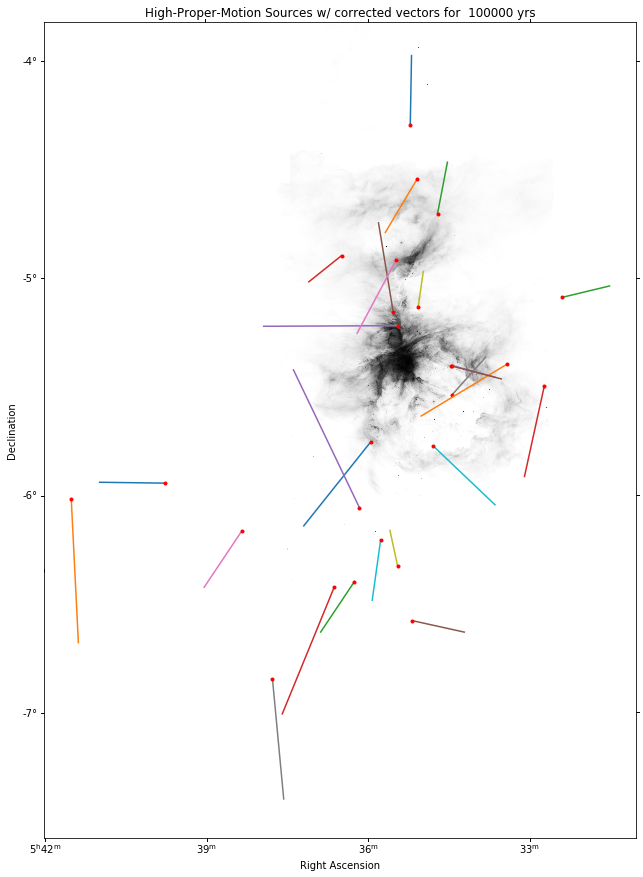

In [46]:
filename = 'C:\\users\\sahal\\2018TrinaryWork\\TrinaryStarSearch\\Data\\ch4_merged_clean.fits'
hdu = fits.open(filename)[0]
hdu.header['CTYPE1']='RA---TAN-SIP'
hdu.header['CTYPE2']='DEC--TAN-SIP'
wcs = WCS(hdu.header)
print(wcs)

#Plot same as above but with corrected coordinates
gtmstp = 100000 #timestep for just gaia
baseRa1 = gTab['ra'][loosemask]
baseDec1 = gTab['dec'][loosemask]

projvecCorrected = [baseRa1 + corrected_pmra/1000 /3600 *gtmstp, baseDec1+corrected_pmdec/1000/3600 * gtmstp]


cCorrected = np.zeros(2 * len(loosemask))
cCorrected[0::2] = baseRa1
cCorrected[1::2]= projvecCorrected[0]
dCorrected = np.zeros(2 * len(loosemask))
dCorrected[0::2] = baseDec1
dCorrected[1::2] = projvecCorrected[1]

pGaiaCorrected = SkyCoord(cCorrected, dCorrected, unit = 'deg', frame = 'icrs')

fig = plt.figure(figsize=(15, 15))
ax = plt.subplot(projection = wcs)
ax.imshow(np.arctan(0.0001*(hdu.data-np.median(hdu.data))), origin='lower',cmap='binary',vmin=0)

for it in range(len(loosemask)):
    anchor = 2 * it
    off = anchor + 2 #the plus 2 accounts for python's indexing



    plt.plot(pGaiaCorrected[anchor:off].ra, pGaiaCorrected[anchor:off].dec, transform = ax.get_transform('icrs'))
    plt.plot(pGaiaCorrected[anchor].ra, pGaiaCorrected[anchor].dec, '.', transform = ax.get_transform('icrs'), color = 'r')

    title = 'High-Proper-Motion Sources w/ corrected vectors for  ' + str(gtmstp) + ' yrs'
    ax.set_title(title)

    xx, yy = (skycoord_to_pixel(pGaiaCorrected[anchor], wcs, mode = 'wcs'))

xLim = plt.xlim()
yLim = plt.ylim()
ax.set_xlabel('Right Ascension')
ax.set_ylabel('Declination')
# plt.savefig('field.png') #FIELD FIGURE
plt.show()

In [47]:
print(pGaiaCorrected)

<SkyCoord (ICRS): (ra, dec) in deg
    [(83.80395554, -4.29718201), (83.7979895 , -3.97554515),
     (83.77100298, -4.54261089), (83.9193674 , -4.79059637),
     (83.67787093, -4.70408436), (83.63225638, -4.46707396),
     (84.12201927, -4.8975397 ), (84.27348022, -5.01808935),
     (83.86252426, -5.22067846), (84.48273182, -5.2227548 ),
     (83.88313026, -5.15772939), (83.95109823, -4.7466019 ),
     (83.86922733, -4.91773219), (84.05036676, -5.25553021),
     (83.61268428, -5.54144668), (83.45532681, -5.36574982),
     (83.76792173, -5.13684069), (83.74393344, -4.97070577),
     (83.69806287, -5.77510147), (83.41223897, -6.0457007 ),
     (83.98709384, -5.75533245), (84.29820723, -6.14218678),
     (83.35681042, -5.39838645), (83.75385701, -5.63690476),
     (83.10002906, -5.08984166), (82.88214874, -5.03759055),
     (83.18366506, -5.4979585 ), (83.2755145 , -5.91554792),
     (83.60906346, -5.4052769 ), (83.41383499, -5.45744594),
     (83.61391001, -5.40619446), (83.38289735, -5.

In [48]:
#Now we go back to the data from Gaia, gTab
linetmstp = -10000000 #timestep for just gaia
baseRa1Line = gTab['ra'][loosemask]
baseDec1Line = gTab['dec'][loosemask]

projvecLine = [baseRa1Line + corrected_pmra/1000 /3600 *linetmstp, baseDec1Line+corrected_pmdec/1000/3600 * linetmstp]


cLine = np.zeros(2 * len(loosemask))
cLine[0::2] = baseRa1Line
cLine[1::2]= projvecLine[0]
dLine = np.zeros(2 * len(loosemask))
dLine[0::2] = baseDec1Line
dLine[1::2] = projvecLine[1]

pGaiaLine = SkyCoord(cLine, dLine, unit = 'deg', frame = 'icrs')

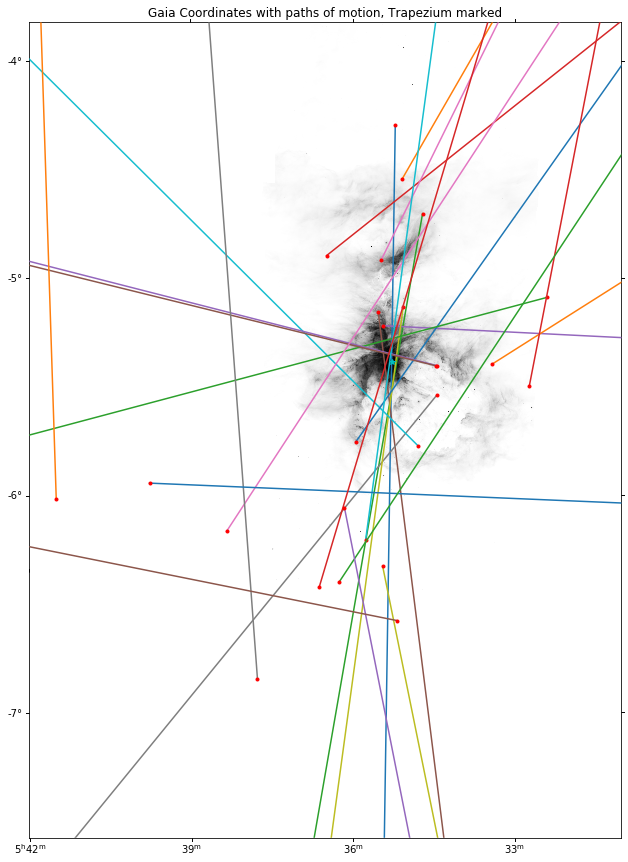

In [49]:
fig = plt.figure(figsize=(15, 15))
ax = plt.subplot(projection = wcs)
ax.imshow(np.arctan(0.0001*(hdu.data-np.median(hdu.data))), origin='lower',cmap='binary',vmin=0)

for it in range(len(loosemask)):
    anchor = 2 * it
    off = anchor + 2 #the plus 2 accounts for python's indexing



    plt.plot(pGaiaLine[anchor:off].ra, pGaiaLine[anchor:off].dec, transform = ax.get_transform('world'))
    plt.plot(pGaiaLine[anchor].ra, pGaiaLine[anchor].dec, '.', transform = ax.get_transform('icrs'), color = 'r')

    title = 'Gaia Coordinates with paths of motion, Trapezium marked'
    ax.set_title(title)

    xx, yy = (skycoord_to_pixel(pGaiaLine[anchor], wcs, mode = 'wcs'))
    
    #ax.set_xlim(xx - 1000, xx + 1000)
    #ax.set_ylim(yy - 1000,yy + 1000)
    
    #print(tab['time'][highlight[it]])
    
plt.xlim(xLim)
plt.ylim(yLim)

now = Time('2016-12-18 05:11:23.5')
now.format = 'yday'

trap = SkyCoord('5h35m16.5s','-5d23m14s',pm_ra_cosdec = 1.96*u.mas/u.year, pm_dec =-0.77*u.mas/u.year,frame='icrs')
plt.plot(trap.ra, trap.dec, marker = '*', linewidth = 10,zorder= 3, transform = ax.get_transform('icrs'), color = 'c')
plt.show()

# Introduce Trapezium influences

In [50]:
#create coordinates for Trapezium stars
thOriA = SkyCoord('5h35m15.8290940s','-05d23m14.153141s', frame = 'icrs')
thOriB = SkyCoord('05h35m16.112s','-05d23 m06.89s', frame = 'icrs')
thOriC = SkyCoord('05h35m16.46375s', '-05d23m22.8486s', frame = 'icrs')
thOriD = SkyCoord('05h35m17.19248s', '-05d23m15.5661s', frame = 'icrs')

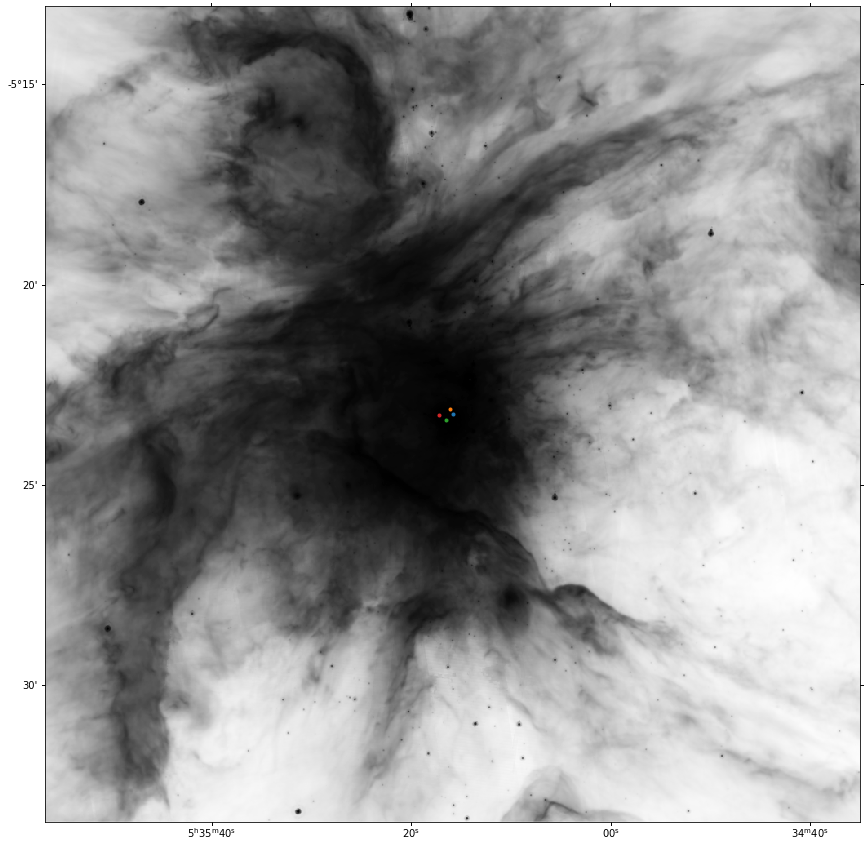

In [51]:
fig = plt.figure(figsize=(15, 15))
ax = plt.subplot(projection = wcs)
ax.imshow(np.arctan(0.0001*(hdu.data-np.median(hdu.data))), origin='lower',cmap='binary',vmin=0)
plt.plot(thOriA.ra,thOriA.dec,'.',transform = ax.get_transform('icrs'))
plt.plot(thOriB.ra,thOriB.dec,'.',transform=ax.get_transform('icrs'))
plt.plot(thOriC.ra,thOriC.dec,'.',transform=ax.get_transform('icrs'))
plt.plot(thOriD.ra,thOriD.dec,'.',transform=ax.get_transform('icrs'))

xx, yy = (skycoord_to_pixel(thOriA, wcs, mode = 'wcs'))
ax.set_xlim(xx - 500, xx + 500)
ax.set_ylim(yy - 500,yy + 500)
plt.show()

In [52]:
traptab = Table([[thOriA.ra.deg,thOriB.ra.deg, thOriC.ra.deg, thOriD.ra.deg],
                [thOriA.dec.deg, thOriB.dec.deg,thOriC.dec.deg, thOriD.dec.deg],
                [1.81,-.9,-4.13,-7.11],[-1.62,.1,6.82,8.29]],
               names =('ra','dec','pmra','pmdec'))
traptab

<Table length=4>
        ra                dec           pmra   pmdec 
     float64            float64       float64 float64
----------------- ------------------- ------- -------
83.81595455833332  -5.387264761388889    1.81   -1.62
83.81713333333332 -5.3852472222222225    -0.9     0.1
83.81859895833333  -5.389680166666667   -4.13    6.82
83.82163533333332         -5.38765725   -7.11    8.29

In [53]:
selStars = gTab[loosemask]

In [54]:
selStars.show_in_notebook()

In [55]:
times = np.arange(-1000000,1,100)

def toffset(pmra, pmdec, dt):
    return (pmra/3600000* dt, pmdec/3600000 * dt)

A_ra,A_dec=traptab[0]['ra'],traptab[0]['dec']
B_ra,B_dec=traptab[1]['ra'],traptab[1]['dec']
C_ra,C_dec=traptab[2]['ra'],traptab[2]['dec']
D_ra,D_dec=traptab[3]['ra'],traptab[3]['dec']

arcsec = 1 / 3600
def approachTrap(ra_in, dec_in, pmra_in, pmdec_in, tstep):
    pmraProj, pmdecProj = toffset(pmra_in, pmdec_in, tstep)
    ra_t = np.array(ra_in + pmraProj)
    dec_t = np.array(dec_in + pmdecProj)
        
    A_dists = np.array(np.sqrt((ra_t-A_ra)**2 + (dec_t-A_dec)**2))
    B_dists = np.array(np.sqrt((ra_t-B_ra)**2 + (dec_t-B_dec)**2))
    C_dists = np.array(np.sqrt((ra_t-C_ra)**2 + (dec_t-C_dec)**2))
    D_dists = np.array(np.sqrt((ra_t-D_ra)**2 + (dec_t-D_dec)**2))
    
    rad = 500 * arcsec#Seems a large number, not sure why this is
    
    A_interact = np.where((A_dists <=  rad))[0]
    B_interact = np.where((B_dists <=  rad))[0]
    C_interact = np.where((C_dists <=  rad))[0]
    D_interact = np.where((D_dists <=  rad))[0]
    comb=np.concatenate([A_interact, B_interact, C_interact, D_interact])
    return(comb)


interactsWithTrap=np.array([])
for i in times:
    val = approachTrap(selStars['ra'],selStars['dec'],selStars['pmra'],selStars['pmdec'], i)
    if val.size > 0:
        interactsWithTrap=np.append(interactsWithTrap,np.unique(val))
        #print(np.unique(val))
        
interactsWithTrap=np.unique(np.array(interactsWithTrap))

In [56]:
interactsWithTrap=list(interactsWithTrap.astype(int))

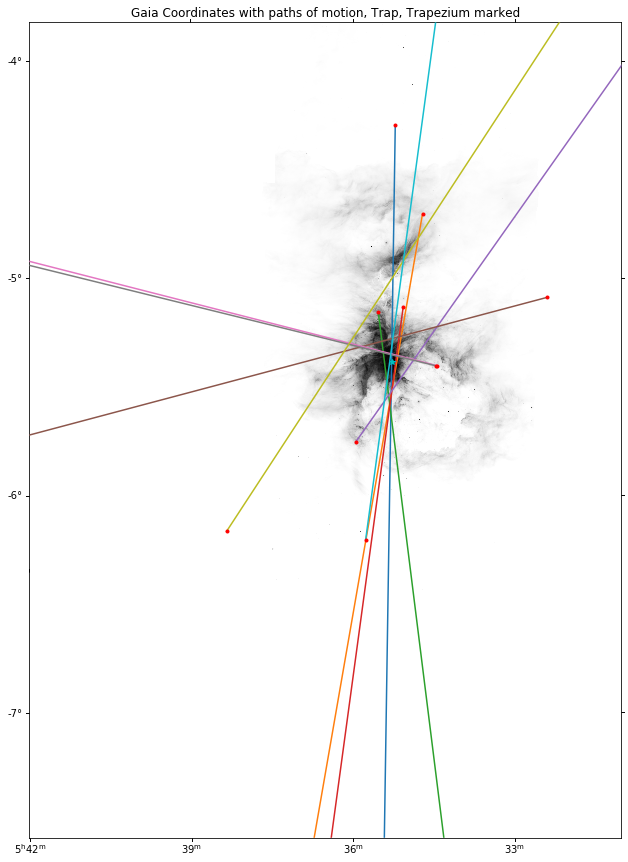

In [57]:
fig = plt.figure(figsize=(15, 15))
ax = plt.subplot(projection = wcs)
ax.imshow(np.arctan(0.0001*(hdu.data-np.median(hdu.data))), origin='lower',cmap='binary',vmin=0)

for it in interactsWithTrap:
    anchor = 2 * it
    off = anchor + 2 #the plus 2 accounts for python's indexing



    plt.plot(pGaiaLine[anchor:off].ra, pGaiaLine[anchor:off].dec, transform = ax.get_transform('world'))
    plt.plot(pGaiaLine[anchor].ra, pGaiaLine[anchor].dec, '.', transform = ax.get_transform('world'), color = 'r')

    title = 'Gaia Coordinates with paths of motion, Trap, Trapezium marked'
    ax.set_title(title)

    xx, yy = (skycoord_to_pixel(pGaiaLine[anchor], wcs, mode = 'wcs'))
    
    #ax.set_xlim(xx - 1000, xx + 1000)
    #ax.set_ylim(yy - 1000,yy + 1000)
    
    #print(tab['time'][highlight[it]])
    
plt.xlim(xLim)
plt.ylim(yLim)

now = Time('2016-12-18 05:11:23.5')
now.format = 'yday'

trap = SkyCoord('5h35m16.5s','-5d23m14s',pm_ra_cosdec = 1.96*u.mas/u.year, pm_dec =-0.77*u.mas/u.year,frame='icrs')
plt.plot(trap.ra, trap.dec, marker = '*', linewidth = 10,zorder= 3, transform = ax.get_transform('icrs'), color = 'c')
plt.show()

In [58]:
nonInteract = np.delete(np.arange(len(loosemask)), interactsWithTrap)
print(interactsWithTrap)
print(nonInteract)

[0, 2, 5, 8, 10, 12, 14, 15, 16, 19]
[ 1  3  4  6  7  9 11 13 17 18 20 21 22 23 24 25]


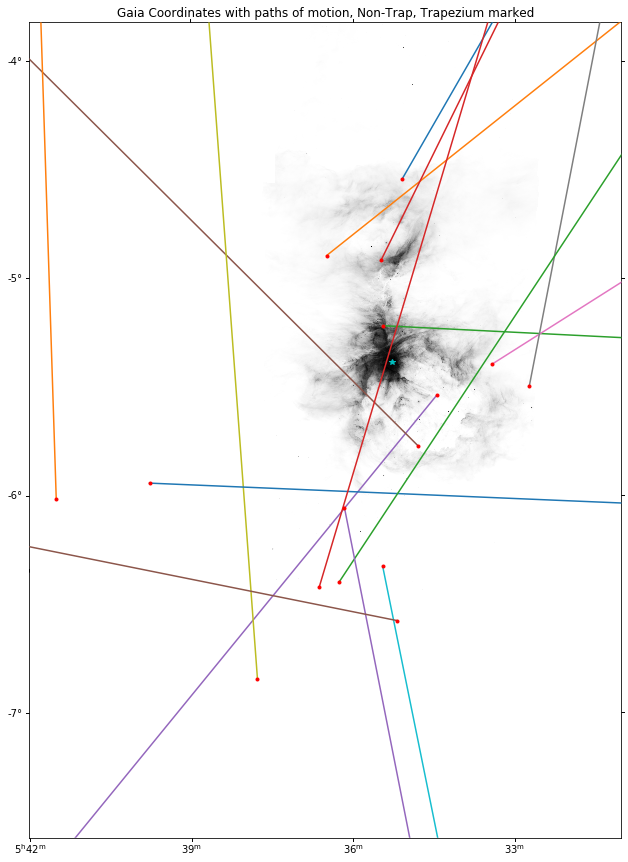

In [59]:
i = 0

fig = plt.figure(figsize=(15, 15))
ax = plt.subplot(projection = wcs)
ax.imshow(np.arctan(0.0001*(hdu.data-np.median(hdu.data))), origin='lower',cmap='binary',vmin=0)

for it in nonInteract:
    anchor = 2 * it
    off = anchor + 2 #the plus 2 accounts for python's indexing



    plt.plot(pGaiaLine[anchor:off].ra, pGaiaLine[anchor:off].dec, transform = ax.get_transform('icrs'))
    plt.plot(pGaiaLine[anchor].ra, pGaiaLine[anchor].dec, '.', transform = ax.get_transform('icrs'), color = 'r')

    title = 'Gaia Coordinates with paths of motion, Non-Trap, Trapezium marked'
    ax.set_title(title)

    xx, yy = (skycoord_to_pixel(pGaiaLine[anchor], wcs, mode = 'wcs'))
    
    #ax.set_xlim(xx - 1000, xx + 1000)
    #ax.set_ylim(yy - 1000,yy + 1000)
    
    #print(tab['time'][highlight[it]])
    
plt.xlim(xLim)
plt.ylim(yLim)

now = Time('2016-12-18 05:11:23.5')
now.format = 'yday'

trap = SkyCoord('5h35m16.5s','-5d23m14s',pm_ra_cosdec = 1.96*u.mas/u.year, pm_dec =-0.77*u.mas/u.year,frame='icrs')
plt.plot(trap.ra, trap.dec, marker = '*', linewidth = 10,zorder= 3, transform = ax.get_transform('icrs'), color = 'c')
plt.show()

Identify all interactions with stationary sources, incorporating errors (use dot product to find the largest angle between all four vectors?). Identify sources that are most likely to originate from specific regions, try to identify some specifics - above green line tracing near filament, pair of close-trapezium interactions that appear to be in binary, etc. Use table of all confirmed sources, cutoff at -7 or -9 deg.

In [60]:
#OB stars in orion
OBTab = Table.read('C:\\Users\sahal\\2018TrinaryWork\\TrinaryStarSearch\\Data\\ob_ori.fits')#changed to ob_ori.fits
OBTab.show_in_notebook()

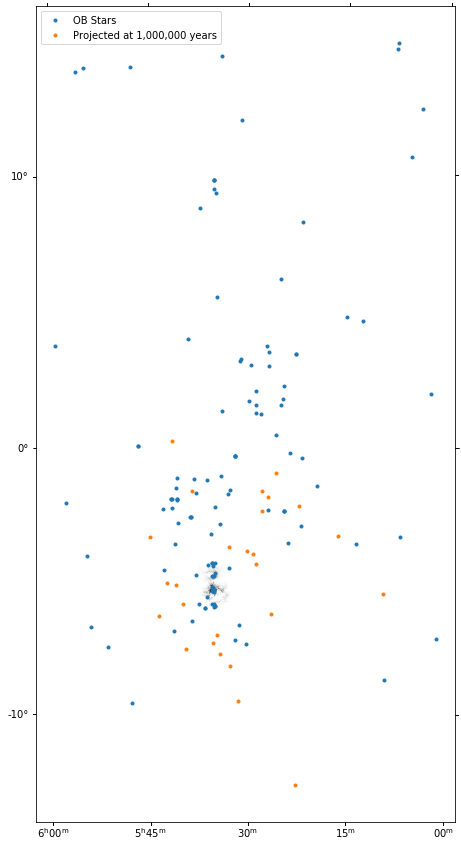

In [61]:
fig = plt.figure(figsize=(15, 15))
ax = plt.subplot(projection = wcs)
ax.imshow(np.arctan(0.0001*(hdu.data-np.median(hdu.data))), origin='lower',cmap='binary',vmin=0)

OBs = SkyCoord(OBTab['ra'], OBTab['dec'], frame = 'icrs')
plt.plot(OBs.ra, OBs.dec, '.', transform = ax.get_transform('icrs'), label = 'OB Stars')


rara = (selStars['ra'] -  1000000 * selStars['pmra']/3600/1000) * u.deg
decdec = (selStars['dec'] - 1000000 * selStars['pmdec']/3600/1000) * u.deg
limits = SkyCoord(rara,decdec, frame = 'icrs')
plt.plot(limits.ra, limits.dec, '.', transform = ax.get_transform('icrs'), label = 'Projected at 1,000,000 years')
plt.legend()

plt.show()

## Develop a method of cone searching stars

In [62]:
#I just realized I can do this:
selectedStars = Table(data)[ii]#data comes from way earlier when I bring in the gaia tab gTab
selectedStars=selectedStars[loosemask]
selectedStars.rename_column('ra_1', 'ra')
selectedStars.rename_column('dec_1','dec')
selectedStars



bgStars = gaiaTab

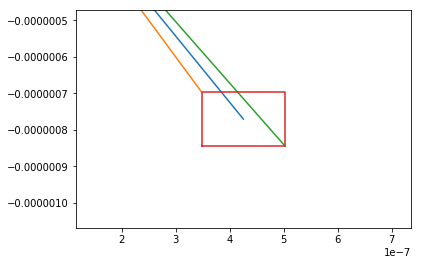

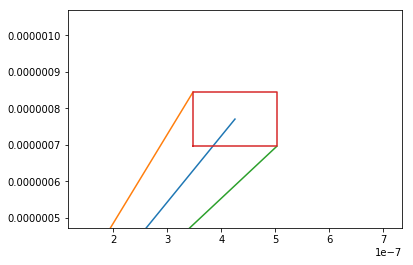

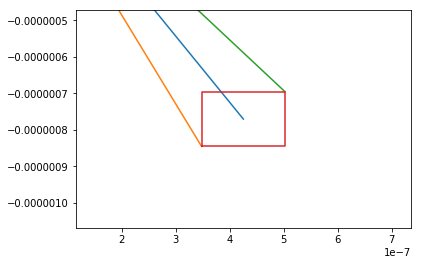

In [63]:
cvt = 1/3600/1000
baseVra = np.array(bgStars['pmra'])*cvt
baseVdec = np.array(bgStars['pmdec'])*cvt
dra = bgStars['pmra_err']/3600/1000
ddec = bgStars['pmdec_err']/3600/1000

k=5
plt.plot([0,baseVra[k]],[0,baseVdec[k]])
plt.plot([0,baseVra[k]-dra[k]],[0,baseVdec[k]+ddec[k]])
plt.plot([0,baseVra[k]+dra[k]],[0,baseVdec[k]-ddec[k]])
#plt.xlim(2*10**-7,3*10**-7)
#plt.ylim(.0000035,.00000360)

x = baseVra[k]
y = baseVdec[k]
dx = dra[k]
dy = ddec[k]

plt.xlim(x-4*dx,x+4*dx)
plt.ylim(y-4*dy,y+4*dy)

plt.plot([x-dx,x+dx,x+dx,x-dx,x-dx],[y-dy,y-dy,y+dy,y+dy,y-dy])

plt.show()

raAbs = np.abs(baseVra)
decAbs = np.abs(baseVdec)
signRa = np.sign(baseVra)
signDec = np.sign(baseVdec)


plt.plot([0,raAbs[k]],[0,decAbs[k]])
plt.plot([0,raAbs[k]-dra[k]],[0,decAbs[k]+ddec[k]])
plt.plot([0,raAbs[k]+dra[k]],[0,decAbs[k]-ddec[k]])

ax = raAbs[k]
ay = decAbs[k]
plt.plot([ax-dx,ax+dx,ax+dx,ax-dx,ax-dx],[ay-dy,ay-dy,ay+dy,ay+dy,ay-dy])
plt.xlim(ax-4*dx,ax+4*dx)
plt.ylim(ay-4*dy,ay+4*dy)
plt.show()

raMax=raAbs-dra
decMax=decAbs+ddec

raMin=raAbs+dra
decMin=decAbs-ddec

raE1 = raMax * signRa
decE1 = decMax * signDec

raE2 = raMin * signRa
decE2 = decMin * signDec

plt.plot([0,baseVra[k]],[0,baseVdec[k]])
plt.plot([0,raE1[k]],[0,decE1[k]])
plt.plot([0,raE2[k]],[0,decE2[k]])
plt.plot([x-dx,x+dx,x+dx,x-dx,x-dx],[y-dy,y-dy,y+dy,y+dy,y-dy])
plt.xlim(x-4*dx,x+4*dx)
plt.ylim(y-4*dy,y+4*dy)
plt.show()

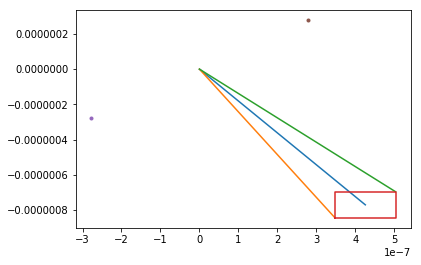

In [64]:
plt.plot([0 ,baseVra[k]],[0,baseVdec[k]])
plt.plot([0,raE1[k]],[0,decE1[k]])
plt.plot([0,raE2[k]],[0,decE2[k]])
plt.plot([x-dx,x+dx,x+dx,x-dx,x-dx],[y-dy,y-dy,y+dy,y+dy,y-dy])
plt.plot(-signRa[k]/3600000, signDec[k]/3600000,'.')
plt.plot(signRa[k]/3600000, -signDec[k]/3600000, '.')
plt.show()

Try a faster method of projection...

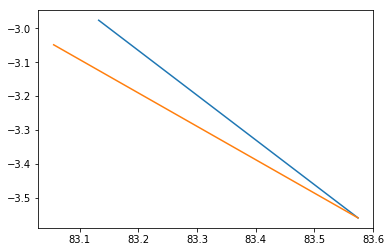

<SkyCoord (ICRS): (ra, dec) in deg
    [(83.57454047, -3.55987926), (83.13227056, -2.97604216)]>
<SkyCoord (ICRS): (ra, dec) in deg
    [(83.57454047, -3.55987926), (83.05549194, -3.04851152)]>


In [65]:
k=0
tt=-1000000
ra = bgStars['ra'][k]
dec = bgStars['dec'][k]
plt.plot([ra,ra+raE1[k]*tt],[dec,dec+decE1[k]*tt])
plt.plot([ra,ra+raE2[k]*tt],[dec,dec+decE2[k]*tt])
plt.show()

n1 = SkyCoord([ra,ra+raE1[k]*tt],[dec,dec+decE1[k]*tt],unit = 'deg', frame = 'icrs')
n2 = SkyCoord([ra,ra+raE2[k]*tt],[dec,dec+decE2[k]*tt],unit = 'deg', frame = 'icrs')
print(n1)
print(n2)

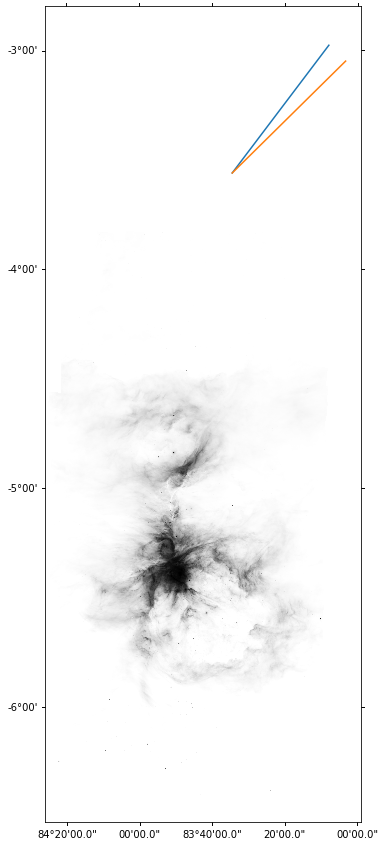

In [66]:
fig = plt.figure(figsize=(15, 15))
ax = plt.subplot(projection = wcs)
ax.imshow(np.arctan(0.0001*(hdu.data-np.median(hdu.data))), origin='lower',cmap='binary',vmin=0)

OBs = SkyCoord(OBTab['ra'], OBTab['dec'], frame = 'icrs')
#plt.plot(OBs.ra, OBs.dec, '.', transform = ax.get_transform('icrs'), label = 'OB Stars')

plt.plot(n1.ra, n1.dec,transform = ax.get_transform('icrs'))
plt.plot(n2.ra, n2.dec, transform = ax.get_transform('icrs'))
##NOTE - distinction between 'icrs' and 'world'


lon = ax.coords[0]
lat = ax.coords[1]
lon.set_major_formatter('dd:mm:ss.s')
lat.set_major_formatter('dd:mm')

plt.show()

In [67]:
"""
def cone():
    ra
    dec
    make cone
    add offsets to either side
  #OFFSET % arcseconds
"""
print(np.sqrt(2*5**2))
sqrt(25/2)

7.0710678118654755


3.5355339059327378

# Fast Cone-Search Projection

In [68]:
gaiaTab

<Table length=1867>
     source_id              designation          ...        DEC_2       
       int64                   str28             ...       float64      
------------------- ---------------------------- ... -------------------
3215934695063940352 Gaia DR2 3215934695063940352 ... -3.5598510277869675
3215667994774624000 Gaia DR2 3215667994774624000 ...  -4.135372161865234
3215672255382161408 Gaia DR2 3215672255382161408 ...  -4.029011798179367
3215671293309507584 Gaia DR2 3215671293309507584 ...          -4.0977778
3209940226388432384 Gaia DR2 3209940226388432384 ... -3.6268760571605347
3215880578476200064 Gaia DR2 3215880578476200064 ... -3.7558309009009654
3215852987606348672 Gaia DR2 3215852987606348672 ...          -4.1104722
3215872396561733504 Gaia DR2 3215872396561733504 ... -3.8642637866890976
3215856732817863168 Gaia DR2 3215856732817863168 ...  -4.035978785002408
3215662943892925696 Gaia DR2 3215662943892925696 ...          -4.1982778
                ...                          ... ...                 ...
3016106118936392960 Gaia DR2 3016106118936392960 ...  -7.044552803039551
3016106909210376704 Gaia DR2 3016106909210376704 ...  -7.040532735943178
3016106806131161088 Gaia DR2 3016106806131161088 ...  -7.028787136077881
3016095501777333376 Gaia DR2 3016095501777333376 ...          -7.1752778
3016099006470651520 Gaia DR2 3016099006470651520 ... -7.1582231521606445
3016106389518168576 Gaia DR2 3016106389518168576 ...  -7.031267166137695
3016101652170495104 Gaia DR2 3016101652170495104 ...  -7.119676116992941
3016091511751904256 Gaia DR2 3016091511751904256 ...  -7.112220764160156
3016106870554572288 Gaia DR2 3016106870554572288 ...  -7.016249282846324
3016099448851632256 Gaia DR2 3016099448851632256 ...  -7.112036228179932

In [69]:
def contains(verts, xpoints, ypoints):
    p = path.Path(verts)
    bools = p.contains_points(np.array([xpoints, ypoints]).T)
    return bools

#takes positions of stationary stars and possible offset multiplier to star with, returns coordinates of cone search
def cone(ra_stat, dec_stat,offsetMultiplier=5, plotting = False):
    arc = 1/3600 #arcsecond in degrees
    cvt = arc/1000 #miliarcseconds to deg
    pmraAvg = np.mean(bgStars['pmra'])
    pmdecAvg = np.mean(bgStars['pmdec'])

    #correct pmras to absolute pm of system
    pmra_corr = -(selStars['pmra']-pmraAvg)*cvt#pmras are in MAS so multiply by cvt DON'T FORGET
    pmdec_corr = -(selStars['pmdec']-pmdecAvg)*cvt
    ##NOTICE: because we are subtractive, we must account for the negative time direction and 
    #negative this NOW in order to get the sign correction correct

    #####Let's go through that process of finding the maximum spread of errors#####
    absPmra = np.abs(pmra_corr)
    absPmdec = np.abs(pmdec_corr)
    signPmra = np.sign(pmra_corr)
    signPmdec = np.sign(pmdec_corr)
    
    maxPmra = absPmra - selStars['pmra_err']*cvt
    maxPmdec = absPmdec + selStars['pmdec_err']*cvt

    minPmra = absPmra + selStars['pmra_err']*cvt
    minPmdec = absPmdec - selStars['pmdec_err']*cvt
    
    optMaxPmra = maxPmra * signPmra 
    optMaxPmdec = maxPmdec * signPmdec
    
    optMinPmra = minPmra * signPmra
    optMinPmdec = minPmdec * signPmdec
    
    #######Now for the initial positions
    raUpOffset = selStars['ra'] - offsetMultiplier * arc * signPmra
    decUpOffset = selStars['dec'] + offsetMultiplier * arc * signPmdec
    
    raDownOffset = selStars['ra'] + offsetMultiplier * arc * signPmra
    decDownOffset = selStars['dec'] - offsetMultiplier * arc * signPmdec
    #effectively, this draws a box around the initial position and selects the corners with the widest spread
    
    #################################################################################
    
    tt = 1000000#myr timestep
    projRaUp  = raUpOffset + tt * optMaxPmra
    projDecUp  = decUpOffset + tt * optMaxPmdec
    projRaDown  = raDownOffset + tt * optMinPmra
    projDecDown = decDownOffset + tt * optMinPmdec
    
    contdIn = []
    for i in range(len(selStars)):
        vertices = [(projRaUp[i],projDecUp[i]), (projRaDown[i],projDecDown[i]), (raDownOffset[i], decDownOffset[i]), (raUpOffset[i], decUpOffset[i])]
        bvals = contains(vertices, ra_stat, dec_stat)
        bToInds = np.where(bvals == True)[0]
        contdIn.append(bToInds)

     #############
    
    if plotting == True:
        for i in range(len(selStars)):
            plt.plot(ra_stat,dec_stat, '.')
            plt.plot([raUpOffset[i],projRaUp[i]],[decUpOffset[i], projDecUp[i]])
            plt.plot([raDownOffset[i], projRaDown[i]], [decDownOffset[i], projDecUp[i]])
            xleft, xright = plt.xlim()
            plt.xlim(xright, xleft)
            plt.show()
        
    return contdIn

In [70]:
!dir "C:\Users\sahal\2018TrinaryWork\TrinaryStarSearch\Data"

 Volume in drive C is Windows
 Volume Serial Number is 9A64-F859

 Directory of C:\Users\sahal\2018TrinaryWork\TrinaryStarSearch\Data

04/18/2019  10:07 AM    <DIR>          .
04/18/2019  10:07 AM    <DIR>          ..
01/15/2019  08:40 PM       243,066,240 ch4_merged_clean.fits
04/13/2019  08:45 PM           328,320 confirmed_condensed.fits
04/13/2019  08:45 PM         4,907,520 conf_in_gaiadr2_OrionTables.fits
04/13/2019  08:45 PM           175,680 ConsolidatedPairsTable.fits
04/13/2019  08:45 PM         3,467,520 enhancedMatchedConfirmedMembers.fits
04/13/2019  08:45 PM         3,519,360 enhancedPlusHighPM.fits
10/03/2018  01:02 AM         6,972,480 gaiadr2_OrionTables.fits
04/13/2019  08:45 PM            11,520 kim18.fits
04/13/2019  08:45 PM         4,089,600 masterconfirmedtable_1.fits
04/13/2019  08:45 PM           126,720 MatchedPairData.fits
04/13/2019  08:45 PM           172,800 matchedWithRvs.fits
04/13/2019  08:45 PM            23,040 obori.fits
04/13/2019  08:45 PM         

# The following stars track back to the Trapezium region:

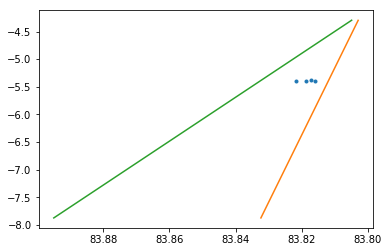

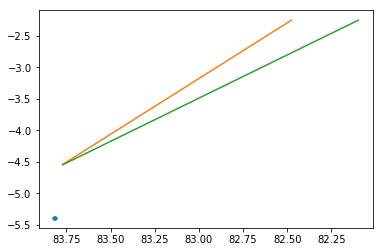

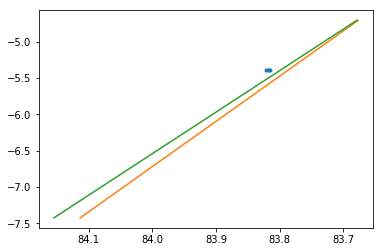

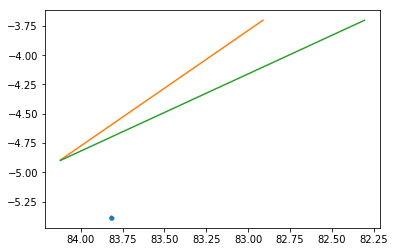

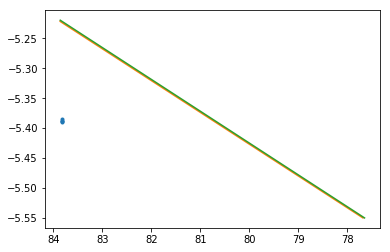

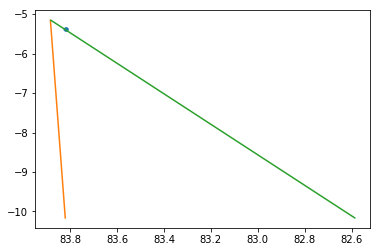

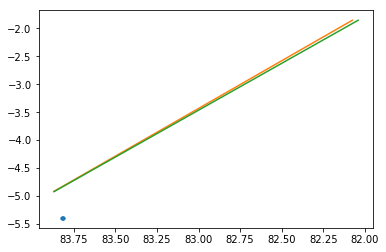

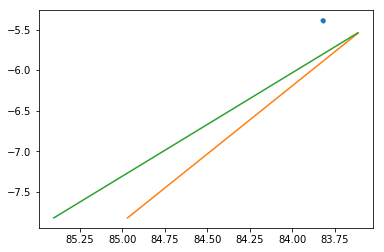

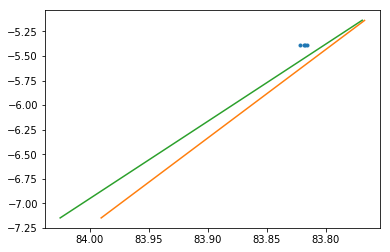

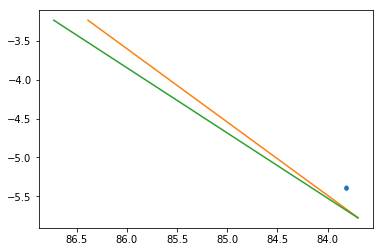

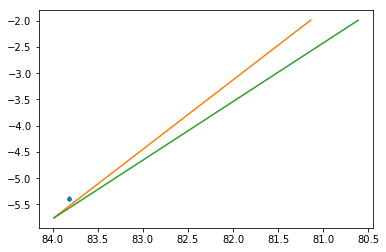

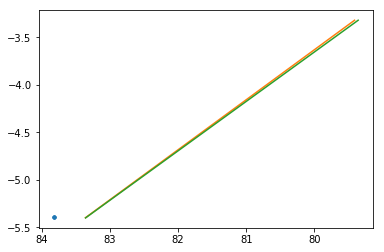

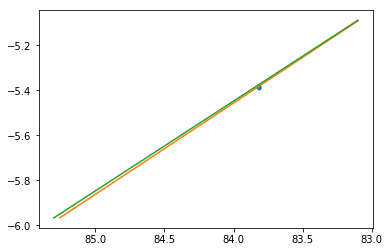

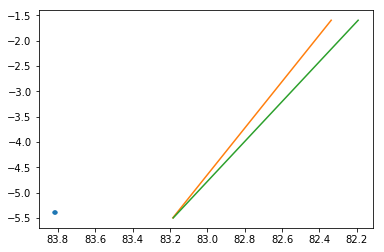

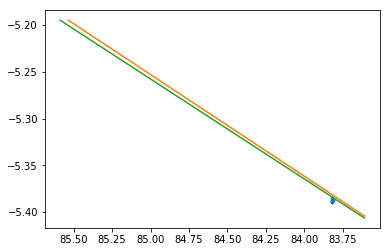

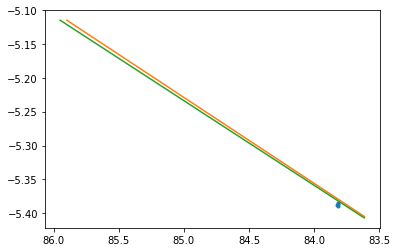

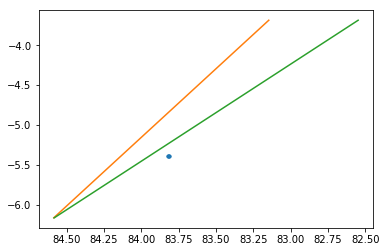

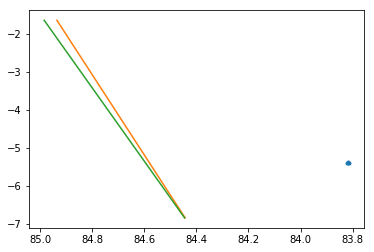

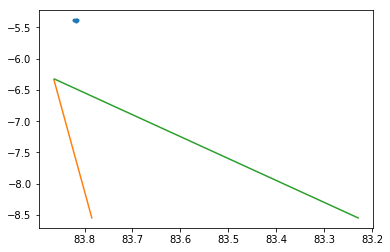

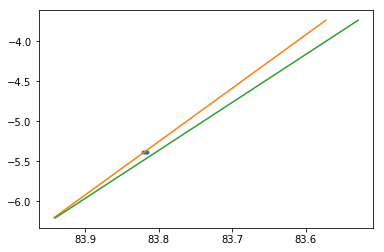

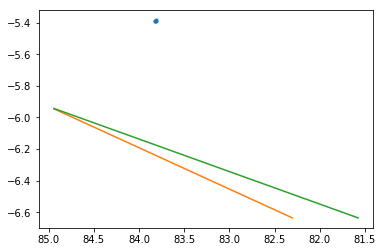

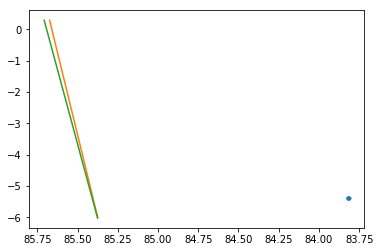

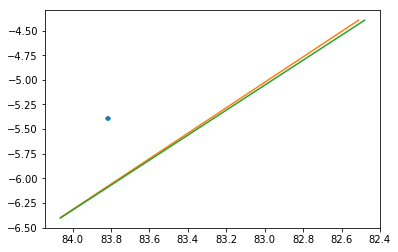

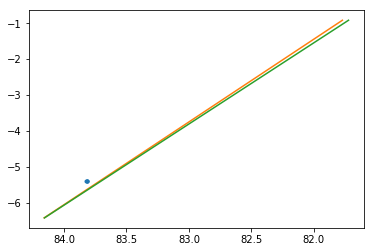

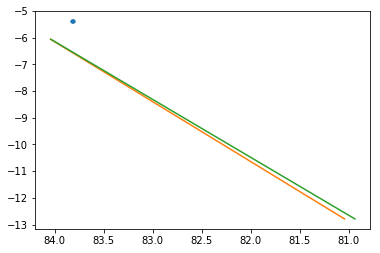

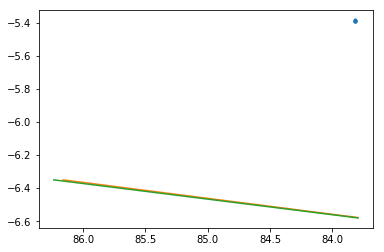

[0, 5, 14, 15, 16, 19]


In [71]:
trapeziumInteract = np.array(cone(traptab['ra'], traptab['dec'], offsetMultiplier = 3.54, plotting=True))
#print(trapeziumInteract)
trp = []
for i in range(len(trapeziumInteract)):
    if trapeziumInteract[i].size!=0:
        trp.append(i)
print(trp)

In [72]:
#print(selStars[trp])
labeltrap = np.ones(6, dtype = bool)
matchtab = Table()
matchtab['designation'] = selStars[trp]['designation']
matchtab['TrapSource'] = labeltrap
matchtab
#matchtab.write('c:\\users\\sahal\\2018TrinaryWork\\TrinaryStarSearch\\WithTrap.fits')

<Table length=6>
        designation          TrapSource
           str28                bool   
---------------------------- ----------
Gaia DR2 3209653627514662528       True
Gaia DR2 3209528081326372864       True
Gaia DR2 3209424108758593536       True
Gaia DR2 3209424108758593408       True
Gaia DR2 3016971567730386432       True
Gaia DR2 3017166907140904320       True

# These stars could potentially interact with OB stars

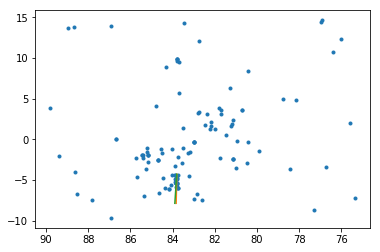

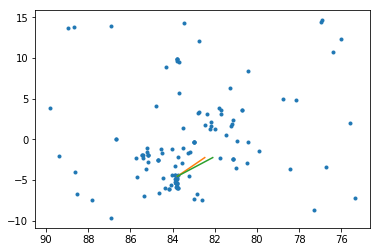

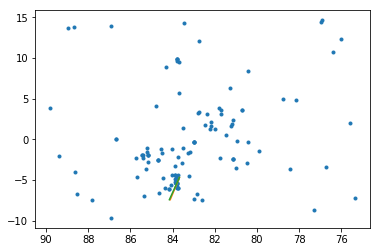

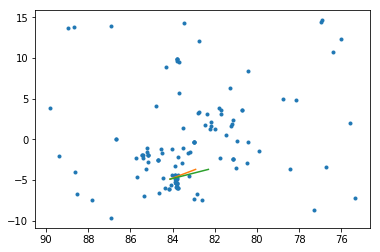

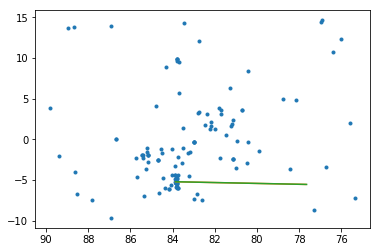

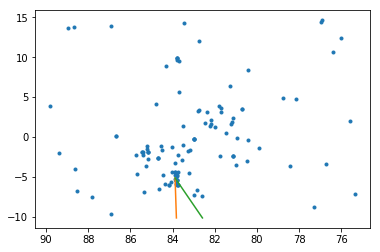

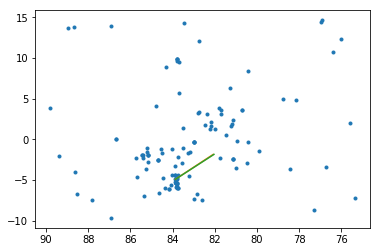

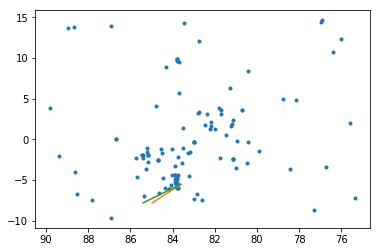

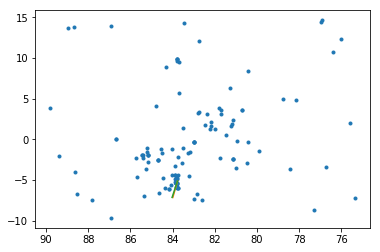

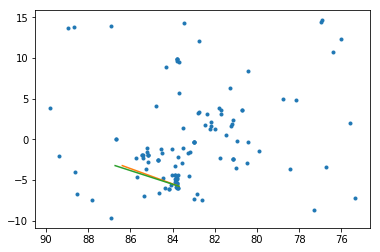

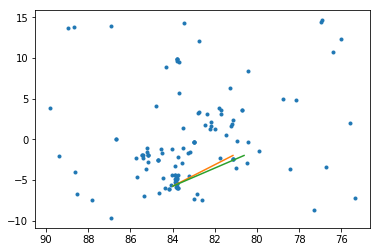

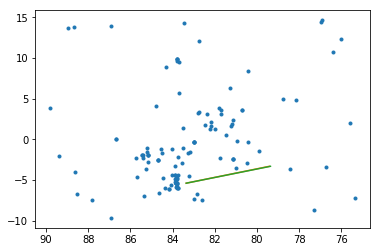

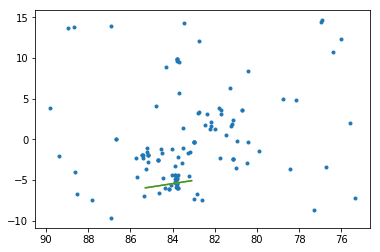

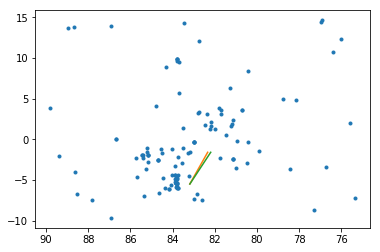

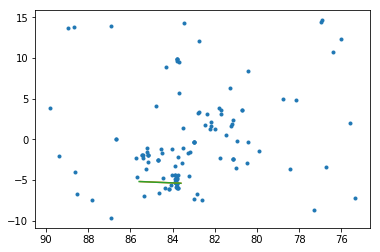

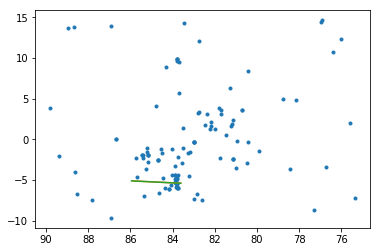

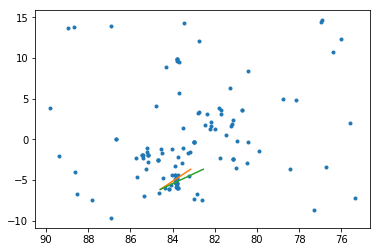

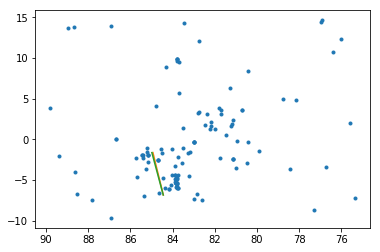

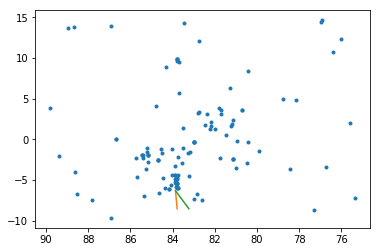

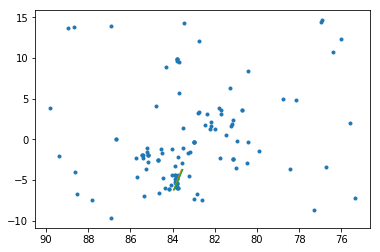

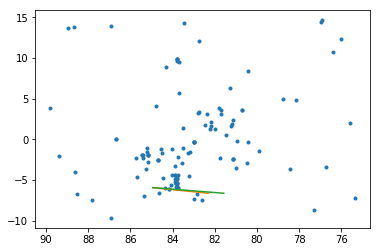

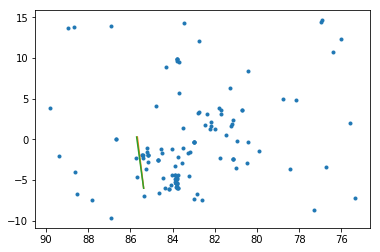

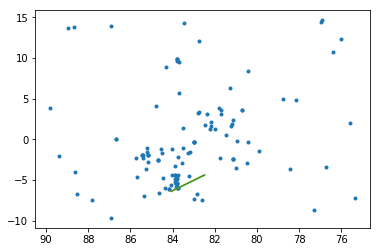

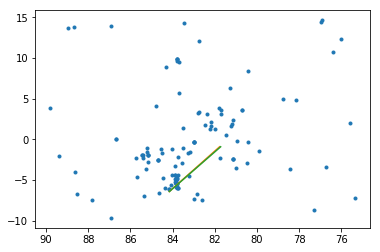

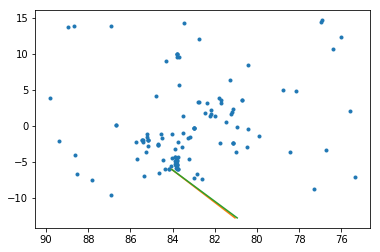

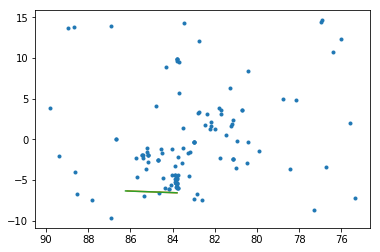

[0, 3, 5, 7, 8, 10, 12, 14, 15, 16, 19, 20, 22]


In [73]:
OBInteract = np.array(cone(OBTab['ra'],OBTab['dec'], offsetMultiplier=3.54, plotting=True))
OBpossible = []
for i in range(len(OBInteract)):
    if OBInteract[i].size!=0:
        OBpossible.append(i)
print(OBpossible)

In [74]:
labelOB = np.ones(len(OBpossible), dtype = bool)
obMatchTab = Table()
obMatchTab['designation']=selStars[OBpossible]['designation']
obMatchTab['OBSource']=labelOB
obMatchTab
#obMatchTab.write('c:\\users\\sahal\\2018trinarywork\\trinarystarsearch\\WithOB.fits')

<Table length=13>
        designation          OBSource
           str28               bool  
---------------------------- --------
Gaia DR2 3209653627514662528     True
Gaia DR2 3209557665063355520     True
Gaia DR2 3209528081326372864     True
Gaia DR2 3017267443735189120     True
Gaia DR2 3209531650444835840     True
Gaia DR2 3017199755050720384     True
Gaia DR2 3209497088842680704     True
Gaia DR2 3209424108758593536     True
Gaia DR2 3209424108758593408     True
Gaia DR2 3016971567730386432     True
Gaia DR2 3017166907140904320     True
Gaia DR2 3017075475875822336     True
Gaia DR2 3016949375634230144     True

In [75]:
#for the other stars
remMatch = Table()
already = np.unique(np.concatenate((trp, OBpossible),0))
print(already)
remaining = Table(np.delete(selStars, already))

lastMatchTab = Table()
lastMatchTab['designation'] = remaining['designation']
lastLabels = np.ones(len(lastMatchTab), dtype = bool)

lastMatchTab['OtherHighPMSource'] = lastLabels

#lastMatchTab.write('c:\\users\\sahal\\2018trinarywork\\trinarystarsearch\\otherHighPMSources.fits', overwrite=True)

[ 0  3  5  7  8 10 12 14 15 16 19 20 22]


In [76]:
#Save these for use in making figures
selStars[trp].write('c://users//sahal/2018TrinaryWork//TrinaryStarSearch//Data//wTrap.fits', overwrite = True)
selStars[OBpossible].write('c://users//sahal/2018TrinaryWork//TrinaryStarSearch//Data//wOB.fits', overwrite = True)
remaining.write('c://users//sahal/2018TrinaryWork//TrinaryStarSearch//Data//wElse.fits', overwrite = True)

In [77]:
confMembers = Table.read('c://users//sahal/2018TrinaryWork//TrinaryStarSearch//Data//oriona-allmembers.fits')
confMembers
#confMembers = Table(confData)
#interActs = cone(confMembers['ra_1'], confMembers['dec_1'], offsetMultiplier = 3.54, plotting=False)
        
#Because this is much too broad, I could quickly use one arcsec tolerance projection to compare versus background stars, but ultimately this wouldn't be much different than my previous work

<Table length=5988>
        RA               DEC         apogee ... getman14b sicilia-aguilar05
     float64           float64        bool  ...    bool          bool      
----------------- ------------------ ------ ... --------- -----------------
83.58733367919922 -4.569249153137207   True ...     False             False
84.02165985107422 -5.694203853607178   True ...     False             False
84.13196563720703 -5.443244934082031   True ...     False             False
84.21223449707031 -5.551224231719971   True ...     False             False
84.32299041748047 -6.213360786437988   True ...     False             False
 85.3271713256836 -7.439227104187012   True ...     False             False
85.10686492919922 -7.093672752380371   True ...     False             False
85.21040344238281 -8.922839164733887   True ...     False             False
85.31195831298828 -8.999197959899902   True ...     False             False
83.43632507324219 -5.351133823394775   True ...     False             False
              ...                ...    ... ...       ...               ...
       83.8189011         -5.2965298  False ...     False             False
        83.788583          -5.282083  False ...     False              True
        83.681667          -5.307667  False ...     False              True
        83.986333          -5.423972  False ...     False              True
        83.862417          -5.220694  False ...     False              True
       83.6312917         -5.2083333  False ...     False              True
       83.9187083            -5.4505  False ...     False              True
       83.6399583         -5.3860833  False ...     False              True
        84.099625         -5.2231111  False ...     False              True
         84.09775         -5.2391389  False ...     False              True

In [78]:
"""pmraAvg = np.mean(bgStars['pmra'])
pmdecAvg = np.mean(bgStars['pmdec'])
interStars = confMembers[interActs[0]]
plt.plot(interStars['ra_1'], interStars['dec_1'], '.')
plt.plot(selStars['ra'][0], selStars['dec'][0], '.')
plt.plot([selStars['ra'][0],selStars['ra'][0]-1000000*(selStars['pmra'][0]/3600000-pmraAvg/3600000)],[selStars['dec'][0],selStars['dec'][0]-1000000*(selStars['pmdec'][0]/3600000+pmdecAvg/3600000)])"""
print()

We take Gaia measurements of the central region of the Orion Nebula, and filter out noise and main-sequence stars. Using gaia's proper motions, we project all stars backwards over a timescale of one million years, with timesteps of 100 years. Any interaction at a distance of less than one parsec is considered significant, and all potential interactions are filtered to find the timestep of closest approach. The alignment of potential pairs' proper motions are considered, along with other aspects such as known membership in the cluster and known binary configurations of either object in the pair. Radial separations are neglected, as measurements are often not precise enough. High-proper-motion sources from Kim (2018) are crossmatched against our pairs, only one match is found. 
Filtering all confirmed members of the Orion group by proper motion, we select a sample of 26 high proper motion outliers to try to trace their origins. It is found that at least 6 sources could originate from interactions with the Trapezium group and 13 sources could originate from interactions with one or more OB stars in the region.

meant to get a picture of the board during this meeting but I forgot

Figures are

{Table of all confirmed sources 

{Table of sources with high proper motions and their potential origins 

Field image of high proper motion sources

High proper motion origins individually with potential sources of origin


don't forget to flip the ra axis (done)

table columns: source_id, ra, dec, pmra $\pm$ pmra_err, pmdec $\pm$ pmdec_err, parallax, rv, isbin, confirmedBy, highpm 

In [79]:
confMembers

<Table length=5988>
        RA               DEC         apogee ... getman14b sicilia-aguilar05
     float64           float64        bool  ...    bool          bool      
----------------- ------------------ ------ ... --------- -----------------
83.58733367919922 -4.569249153137207   True ...     False             False
84.02165985107422 -5.694203853607178   True ...     False             False
84.13196563720703 -5.443244934082031   True ...     False             False
84.21223449707031 -5.551224231719971   True ...     False             False
84.32299041748047 -6.213360786437988   True ...     False             False
 85.3271713256836 -7.439227104187012   True ...     False             False
85.10686492919922 -7.093672752380371   True ...     False             False
85.21040344238281 -8.922839164733887   True ...     False             False
85.31195831298828 -8.999197959899902   True ...     False             False
83.43632507324219 -5.351133823394775   True ...     False             False
              ...                ...    ... ...       ...               ...
       83.8189011         -5.2965298  False ...     False             False
        83.788583          -5.282083  False ...     False              True
        83.681667          -5.307667  False ...     False              True
        83.986333          -5.423972  False ...     False              True
        83.862417          -5.220694  False ...     False              True
       83.6312917         -5.2083333  False ...     False              True
       83.9187083            -5.4505  False ...     False              True
       83.6399583         -5.3860833  False ...     False              True
        84.099625         -5.2231111  False ...     False              True
         84.09775         -5.2391389  False ...     False              True

In [80]:
aa_conf = np.where(confMembers['apogee'] == True)[0]#1
bb_conf = np.where(confMembers['grosschedl18'] == True)[0]#2
cc_conf = np.where(confMembers['fang09'] == True)[0]#3
dd_conf = np.where(confMembers['fang13'] == True)[0]#4
ee_conf = np.where(confMembers['hsu12'] == True)[0]#5
ff_conf = np.where(confMembers['hsu13'] == True)[0]#6
gg_conf = np.where(confMembers['kounkel16'] == True)[0]#7
hh_conf = np.where(confMembers['hasenberger16'] == True)[0]#8
ii_conf= np.where(confMembers['pillitteri13'] == True)[0]#9
jj_conf= np.where(confMembers['fang17'] == True)[0]#10
kk_conf= np.where(confMembers['megeath12'] == True)[0]#11
ll_conf= np.where(confMembers['kounkel17'] == True)[0]#12
mm_conf= np.where(confMembers['rebull06'] == True)[0]#13
nn_conf= np.where(confMembers['furesz08'] == True)[0]#14
oo_conf= np.where(confMembers['getman05'] == True)[0]#15
pp_conf= np.where(confMembers['hillenbrand97'] == True)[0]#16
qq_conf= np.where(confMembers['dario10'] == True)[0]#17
rr_conf= np.where(confMembers['dario12'] == True)[0]#18
ss_conf= np.where(confMembers['kuhn14'] == True)[0]#19
tt_conf= np.where(confMembers['getman14a'] == True)[0]#20
uu_conf= np.where(confMembers['getman14b'] == True)[0]#21
vv_conf= np.where(confMembers['sicilia-aguilar05'] == True)[0]#22

allCols = [aa_conf, bb_conf, cc_conf, dd_conf, ee_conf, ff_conf, gg_conf, hh_conf, ii_conf, jj_conf, kk_conf, ll_conf, mm_conf, nn_conf, oo_conf, pp_conf, qq_conf, 
     rr_conf, ss_conf, tt_conf, uu_conf, vv_conf]

confColumn = np.full(len(confMembers), "", dtype = np.object)
for c in range(len(allCols)):
    wheres = allCols[c]
    addCol = np.full(len(confMembers), "", dtype = np.object)
    addCol[wheres] = str(c+1) + " "
    confColumn = confColumn + addCol

#This is now ready to be added to a table
#I know I've made too many tables already but
conf = confMembers[:]
conf.remove_columns([                
                    'apogee',
                   'grosschedl18', 'fang09','fang13', 'hsu12', 'hsu13', 'kounkel16','hasenberger16',
                    'pillitteri13','fang17','megeath12','kounkel17','rebull06', 'furesz08','getman05',
                   'hillenbrand97','dario10', 'dario12', 'kuhn14', 'getman14a', 'getman14b', 
                   'sicilia-aguilar05'])
conf['Confirmed'] = confColumn.astype(str)
#conf.write('c://Users//sahal//2018TrinaryWork//TrinaryStarSearch//Data//confirmed_condensed.fits')
conf

<Table length=5988>
        RA               DEC         Confirmed
     float64           float64         str37  
----------------- ------------------ ---------
83.58733367919922 -4.569249153137207        1 
84.02165985107422 -5.694203853607178     1 18 
84.13196563720703 -5.443244934082031     1 14 
84.21223449707031 -5.551224231719971     1 10 
84.32299041748047 -6.213360786437988      1 9 
 85.3271713256836 -7.439227104187012      1 2 
85.10686492919922 -7.093672752380371      1 2 
85.21040344238281 -8.922839164733887      1 5 
85.31195831298828 -8.999197959899902      1 5 
83.43632507324219 -5.351133823394775        1 
              ...                ...       ...
       83.8189011         -5.2965298       19 
        83.788583          -5.282083       22 
        83.681667          -5.307667       22 
        83.986333          -5.423972       22 
        83.862417          -5.220694       22 
       83.6312917         -5.2083333       22 
       83.9187083            -5.4505       22 
       83.6399583         -5.3860833       22 
        84.099625         -5.2231111       22 
         84.09775         -5.2391389       22

In [81]:
!dir C:\Users\sahal\2018TrinaryWork\TrinaryStarSearch\Data

 Volume in drive C is Windows
 Volume Serial Number is 9A64-F859

 Directory of C:\Users\sahal\2018TrinaryWork\TrinaryStarSearch\Data

06/19/2019  01:22 PM    <DIR>          .
06/19/2019  01:22 PM    <DIR>          ..
01/15/2019  08:40 PM       243,066,240 ch4_merged_clean.fits
04/13/2019  08:45 PM           328,320 confirmed_condensed.fits
04/13/2019  08:45 PM         4,907,520 conf_in_gaiadr2_OrionTables.fits
04/13/2019  08:45 PM           175,680 ConsolidatedPairsTable.fits
04/13/2019  08:45 PM         3,467,520 enhancedMatchedConfirmedMembers.fits
04/13/2019  08:45 PM         3,519,360 enhancedPlusHighPM.fits
10/03/2018  01:02 AM         6,972,480 gaiadr2_OrionTables.fits
04/13/2019  08:45 PM            11,520 kim18.fits
04/13/2019  08:45 PM         4,089,600 masterconfirmedtable_1.fits
04/13/2019  08:45 PM           126,720 MatchedPairData.fits
04/13/2019  08:45 PM           172,800 matchedWithRvs.fits
04/13/2019  08:45 PM            23,040 obori.fits
04/13/2019  08:45 PM         

In [82]:
Table.read('c:\\users\\sahal\\2018TrinaryWork\\TrinaryStarSearch\\data\\orion_rvs.fits')

<Table length=8674>
    ra       dec        rv      rve    isbin
 float64   float64   float64  float64  int16
--------- ---------- -------- -------- -----
83.733875 -5.1004886  25.0423 0.805973     0
83.723875 -5.0969225  27.5844 0.412627     0
83.719833 -5.0141417  27.7038 0.687142     0
83.701208 -5.1203803  21.8736 0.293945     0
83.703792 -4.9539753   28.981  0.51847     0
83.561958 -5.2384392  27.4366 0.620989     0
   83.587 -5.1139278  26.7878 0.703281     0
83.642375 -5.0880583  30.4807 0.616941     0
83.611458 -5.0216056   29.892 0.428404     0
  83.6265 -4.9514417  30.7507 0.521723     0
      ...        ...      ...      ...   ...
88.039291  9.0582457  45.8823  0.24703    -1
88.043022 0.66808301  13.3523 0.162549    -1
88.045197  -0.392573  43.1717 0.386444    -1
88.054398  8.8595076   53.222 0.189569    -1
88.057701  9.2223635   56.984 0.225434    -1
88.061836   9.088666 -21.3973  0.19611    -1
88.093315 0.29146001 0.399304 0.392625    -1
88.093552  -0.207335  79.2033 0.131035    -1
88.098457   0.117237  33.9539 0.417788    -1
84.465546 -2.1652229  53.1297 0.149576     0

In [83]:
hdunew = fits.open('c:\\users\\sahal\\2018TrinaryWork\\TrinaryStarSearch\\data\\gaiadr2_oriontables.fits')
dat = hdunew[1].data
gt = Table(dat)
gt

<Table length=13212>
     source_id              designation          ... visibility_periods_used
       int64                   str28             ...          int16         
------------------- ---------------------------- ... -----------------------
3209059513278343552 Gaia DR2 3209059513278343552 ...                       8
3209079995979068544 Gaia DR2 3209079995979068544 ...                      13
3209059547638087552 Gaia DR2 3209059547638087552 ...                      13
3209056455261607808 Gaia DR2 3209056455261607808 ...                      13
3209056523981289216 Gaia DR2 3209056523981289216 ...                      13
3209059689371505280 Gaia DR2 3209059689371505280 ...                      11
3209059655011782784 Gaia DR2 3209059655011782784 ...                       6
3209083015340047232 Gaia DR2 3209083015340047232 ...                      12
3209279553043481472 Gaia DR2 3209279553043481472 ...                      12
3209280446395693184 Gaia DR2 3209280446395693184 ...                      11
                ...                          ... ...                     ...
3016100823240660608 Gaia DR2 3016100823240660608 ...                      10
3016106114640322560 Gaia DR2 3016106114640322560 ...                      11
3016105633605578240 Gaia DR2 3016105633605578240 ...                      11
3016091511751904256 Gaia DR2 3016091511751904256 ...                      11
3016102781746112384 Gaia DR2 3016102781746112384 ...                      10
3016106870554572288 Gaia DR2 3016106870554572288 ...                      11
3016107248512612992 Gaia DR2 3016107248512612992 ...                      10
3016099929887990016 Gaia DR2 3016099929887990016 ...                      11
3016099448851632256 Gaia DR2 3016099448851632256 ...                      12
3016857699558383360 Gaia DR2 3016857699558383360 ...                       9

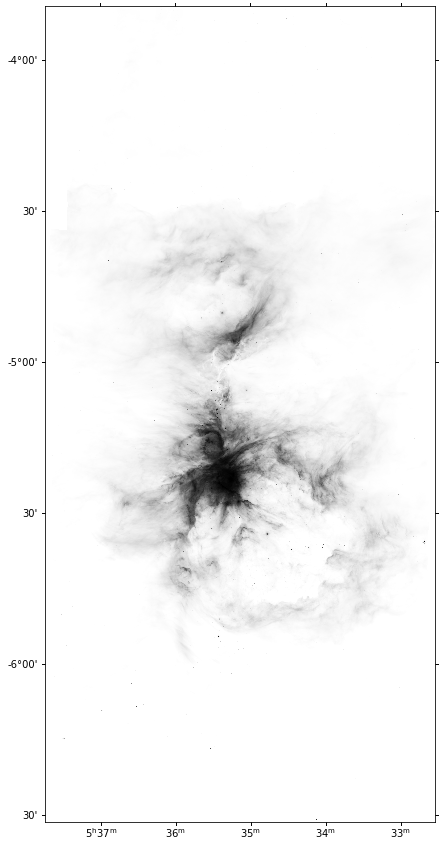

In [84]:
trTab = selStars[trp]
obTab = selStars[OBpossible]
#remaining

tcoord = SkyCoord(trTab['ra'], trTab['dec'], unit = 'deg', frame = 'icrs')
obcoord = SkyCoord(obTab['ra'], obTab['dec'], unit = 'deg', frame = 'icrs')
rcoord = SkyCoord(remaining['ra'], remaining['dec'], unit = 'deg', frame = 'icrs')

fig = plt.figure(figsize=(15, 15))
ax = plt.subplot(projection = wcs)
ax.imshow(np.arctan(0.0001*(hdu.data-np.median(hdu.data))), origin='lower',cmap='binary',vmin=0)


plt.show()

4/10 Work on Plotting Better

In [85]:
"""def contains(verts, xpoints, ypoints):
    p = path.Path(verts)
    bools = p.contains_points(np.array([xpoints, ypoints]).T)
    return bools"""

#takes positions of stationary stars and possible offset multiplier to star with, returns coordinates of cone search
def conePlot(inTab, ra_stat, dec_stat,offsetMultiplier=5, plotting = False):
    arc = 1/3600 #arcsecond in degrees
    cvt = arc/1000 #miliarcseconds to deg
    pmraAvg = np.mean(bgStars['pmra'])
    pmdecAvg = np.mean(bgStars['pmdec'])

    #correct pmras to absolute pm of system
    pmra_corr = -(selStars['pmra']-pmraAvg)*cvt#pmras are in MAS so multiply by cvt DON'T FORGET
    pmdec_corr = -(selStars['pmdec']-pmdecAvg)*cvt
    ##NOTICE: because we are subtractive, we must account for the negative time direction and 
    #negative this NOW in order to get the sign correction correct

    #####Let's go through that process of finding the maximum spread of errors#####
    absPmra = np.abs(pmra_corr)
    absPmdec = np.abs(pmdec_corr)
    signPmra = np.sign(pmra_corr)
    signPmdec = np.sign(pmdec_corr)
    
    maxPmra = absPmra - selStars['pmra_err']*cvt
    maxPmdec = absPmdec + selStars['pmdec_err']*cvt

    minPmra = absPmra + selStars['pmra_err']*cvt
    minPmdec = absPmdec - selStars['pmdec_err']*cvt
    
    optMaxPmra = maxPmra * signPmra 
    optMaxPmdec = maxPmdec * signPmdec
    
    optMinPmra = minPmra * signPmra
    optMinPmdec = minPmdec * signPmdec
    
    #######Now for the initial positions
    raUpOffset = selStars['ra'] - offsetMultiplier * arc * signPmra
    decUpOffset = selStars['dec'] + offsetMultiplier * arc * signPmdec
    
    raDownOffset = selStars['ra'] + offsetMultiplier * arc * signPmra
    decDownOffset = selStars['dec'] - offsetMultiplier * arc * signPmdec
    #effectively, this draws a box around the initial position and selects the corners with the widest spread
    
    #################################################################################
    
    tt = 1000000#myr timestep
    projRaUp  = raUpOffset + tt * optMaxPmra
    projDecUp  = decUpOffset + tt * optMaxPmdec
    projRaDown  = raDownOffset + tt * optMinPmra
    projDecDown = decDownOffset + tt * optMinPmdec
    
    contdIn = []
    for i in range(len(selStars)):
        vertices = [(projRaUp[i],projDecUp[i]), (projRaDown[i],projDecDown[i]), (raDownOffset[i], decDownOffset[i]), (raUpOffset[i], decUpOffset[i])]
        bvals = contains(vertices, ra_stat, dec_stat)
        bToInds = np.where(bvals == True)[0]
        contdIn.append(bToInds)

     #############
    
    if plotting == True:
        for i in range(len(selStars)):
            plt.plot(ra_stat,dec_stat, '.')
            plt.plot([raUpOffset[i],projRaUp[i]],[decUpOffset[i], projDecUp[i]])
            plt.plot([raDownOffset[i], projRaDown[i]], [decDownOffset[i], projDecUp[i]])
            xleft, xright = plt.xlim()
            plt.xlim(xright, xleft)
            plt.show()
        
    return contdIn

# Explore stars aligned away from the Trapezium Region

In [86]:
#take average position of trapezium sources
#subtract from positions of stars to find line of distance
#find angle (dot product?) between this vector and corrected pms of all stars
#filter to within some given angle